
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [5]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [6]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [7]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1378  0.109500    0.004444  0.762500                4.204430   
1379 -0.116500    0.008900  0.646000                4.208539   
1380  0.008667   -0.037618  0.654667                4.212648   
1381 -0.063000   -0.014340  0.591667                4.217784   
1382  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1378          2169.361647            9297.484543   185.046491   
1379          2169.079601            9312.779010   185.053796   
1380          2168.797556            9303.753420   185.007919   
1381          2168.444999            9333.448101   184.942435   
1382          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
0                       0.0           0.0           0.354        0.16   
1                       0.0           0.0           0.313        0.83   
2                       0.0           0.0           0.360        0.10   
3                       0.0           0.0           0.319        0.34   
4                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1378                    0.0           0.0           0.343        0.30   
1379                    0.0           0.0           0.324        0.30   
1380                    0.0           0.0           0.325        0.16   
1381                    0.0           0.0           0.335        0.26   
1382                    0.0           0.0           0.328        1.08   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
0               21.080431             18.313322             4.131228   
1               20.996415             18.311768             4.133911   
2               20.749627             18.341701             4.137632   
3               20.609259             18.644476             4.142824   
4               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1378            21.039583             18.308225             4.129485   
1379            21.043999             18.308776             4.129674   
1380            21.048415             18.309327             4.129862   
1381            21.053935             18.310016             4.130097   
1382            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
0               54.940123    171.769513    182.533770    148.126483   
1               55.072779    170.595469    183.725050    148.161842   
2               55.375043    167.017421    195.812061    147.562523   
3               55.341884    154.214917    188.028883    147.807509   
4               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1378            55.162782    167.619915    185.900341    148.103530   
1379            55.162767    164.706552    182.408576    148.106012   
1380            55.140373    166.903493    181.684649    148.108493   
1381


## Training Functions


In [8]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        ## loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        ## loss =  (0.1)*loss_SI + Curve_SIMs[0] + Curve_SIMs[1] + Curve_SIMs[2] + Curve_SIMs[3]  
        
        loss =  (0)*loss_SI + Curve_SIMs[1]  
       
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        history['loss_SIM2'].append( Curve_SIMs[2] )
        history['loss_SIM3'].append( Curve_SIMs[3] )
        history['loss_SIM4'].append( Curve_SIMs[4] )
        history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [9]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  2.4254748821258545
seq length of pred =  30
500 train loss =  2.4933922290802
seq length of pred =  30
1000 train loss =  2.3840067386627197
seq length of pred =  30
1500 train loss =  2.5432872772216797
seq length of pred =  30
2000 train loss =  2.565955400466919
seq length of pred =  30
2500 train loss =  2.535037040710449
seq length of pred =  30


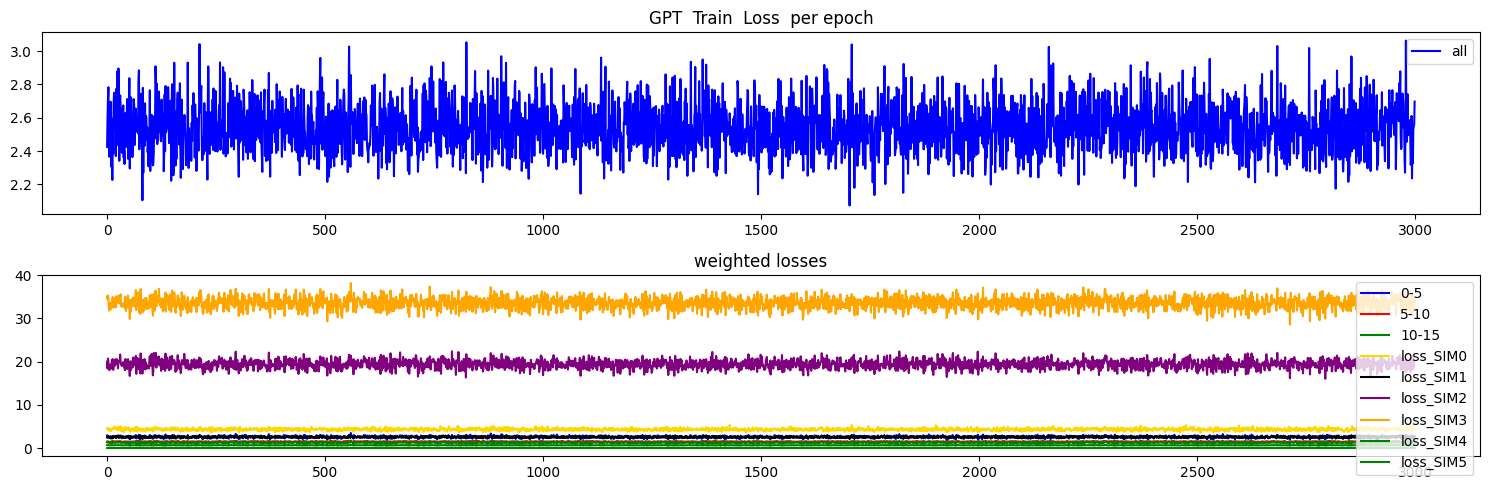

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.09277254343032837
Test MSE Loss - SI only 0-5:  0.0025110398419201374
Test MSE Loss - SI only 5-10:  0.09303802251815796
Test MSE Loss - SI only 10-15:  0.13295571506023407
mae, mse, rmse, mape, mspe, rse, corr
(0.21305932, 0.092772536, 0.30458584, 3.8242471, 161.10223, 1.6071851)
Testing R**2 - SI only:  -1.5830442922050056
Testing R**2 - SI only:  -1.5830442922050056
Testing R**2 - All features:  0.9916406730487031
Testing R**2 - (f2) - SI full:  -1.5773273916854573


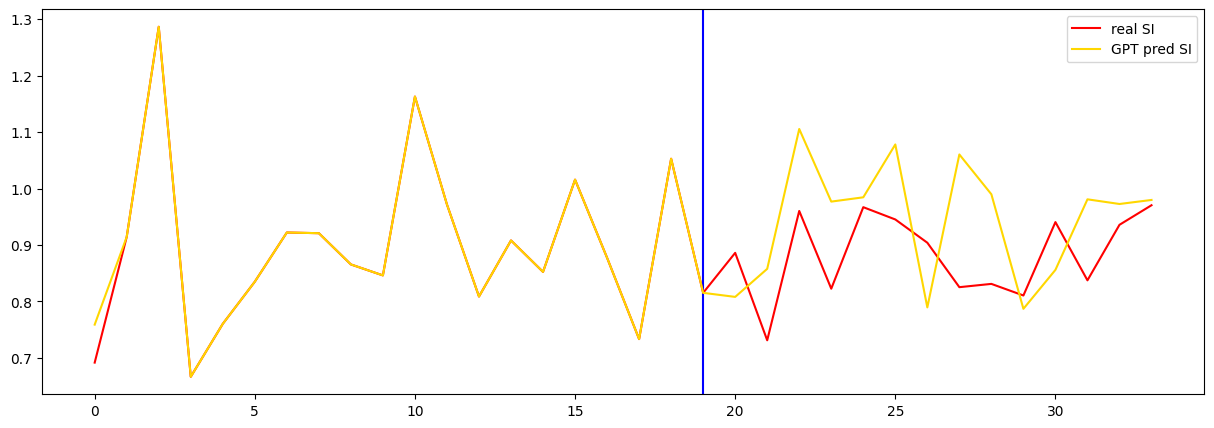

In [10]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.5226967334747314
seq length of pred =  30
500 train loss =  2.451422691345215
seq length of pred =  30
1000 train loss =  2.867952346801758
seq length of pred =  30
1500 train loss =  2.590954065322876
seq length of pred =  30
2000 train loss =  2.3453404903411865
seq length of pred =  30
2500 train loss =  2.506402015686035
seq length of pred =  30


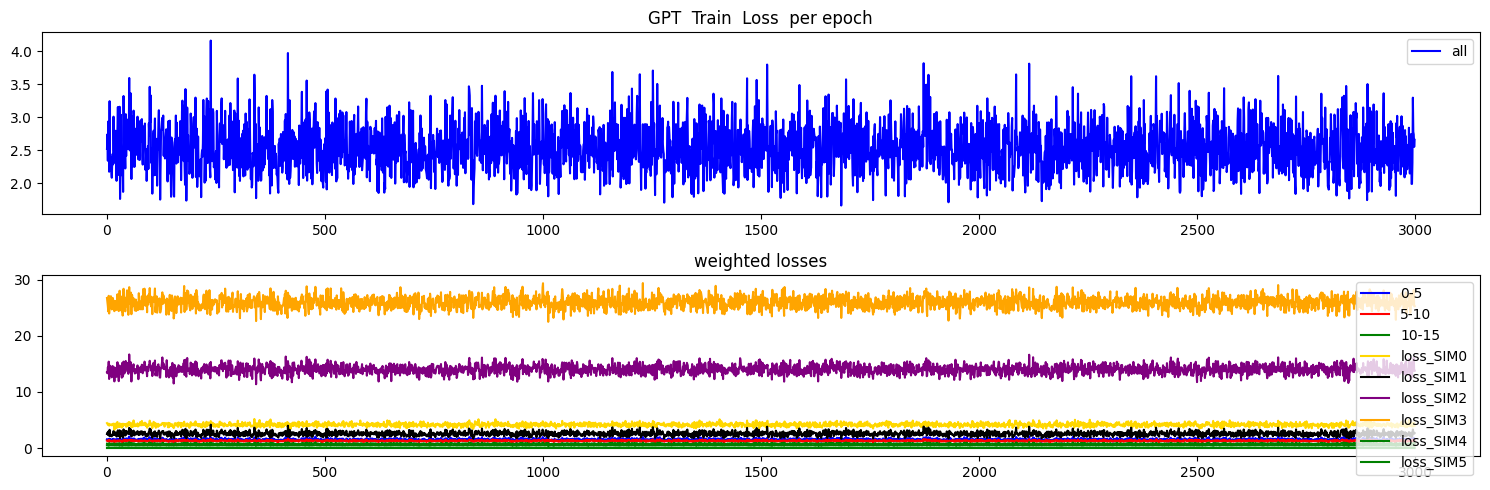

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0953005850315094
Test MSE Loss - SI only 0-5:  0.0025110398419201374
Test MSE Loss - SI only 5-10:  0.09303802251815796
Test MSE Loss - SI only 10-15:  0.13295571506023407
mae, mse, rmse, mape, mspe, rse, corr
(0.22311564, 0.09530058, 0.30870792, 4.4828963, 168.53915, 1.6289357)
Testing R**2 - SI only:  -1.6534316919087524
Testing R**2 - SI only:  -1.6534316919087524
Testing R**2 - All features:  0.988534586275782
Testing R**2 - (f2) - SI full:  -1.8038538903968973


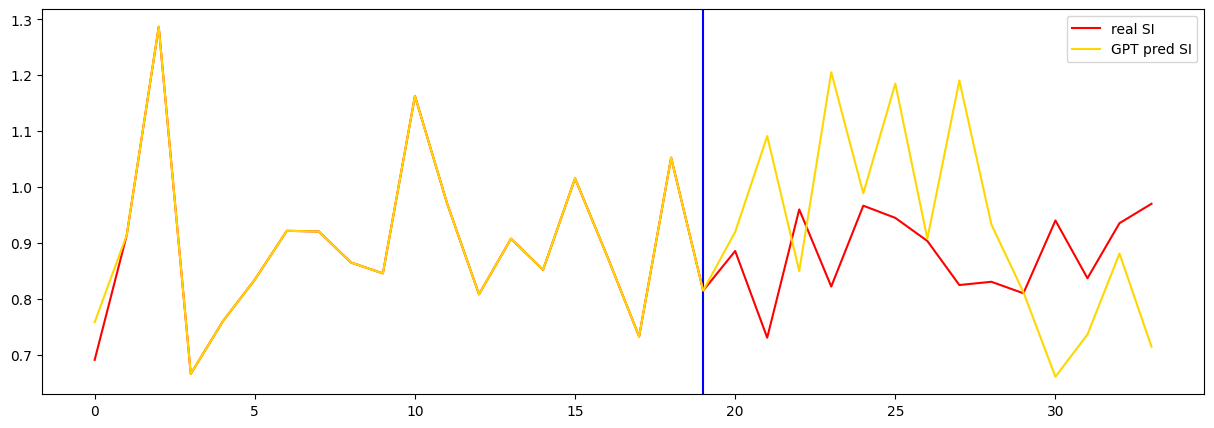

In [11]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.9417057037353516
seq length of pred =  30
500 train loss =  2.5960159301757812
seq length of pred =  30
1000 train loss =  2.106926918029785
seq length of pred =  30
1500 train loss =  2.4128341674804688
seq length of pred =  30
2000 train loss =  2.0589561462402344
seq length of pred =  30
2500 train loss =  2.470527172088623
seq length of pred =  30


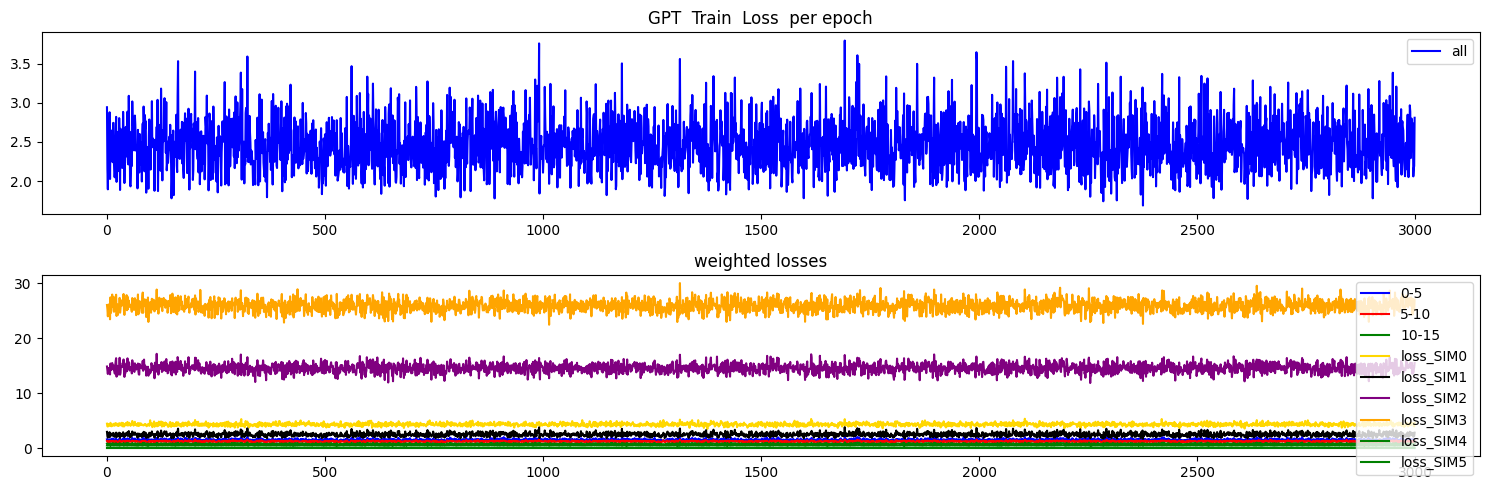

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.09590687602758408
Test MSE Loss - SI only 0-5:  0.0025110398419201374
Test MSE Loss - SI only 5-10:  0.09303802251815796
Test MSE Loss - SI only 10-15:  0.13295571506023407
mae, mse, rmse, mape, mspe, rse, corr
(0.2203632, 0.095906876, 0.30968836, 4.0075297, 162.28264, 1.6341091)
Testing R**2 - SI only:  -1.6703128005945982
Testing R**2 - SI only:  -1.6703128005945982
Testing R**2 - All features:  0.9925598830037909
Testing R**2 - (f2) - SI full:  -1.454383582049244


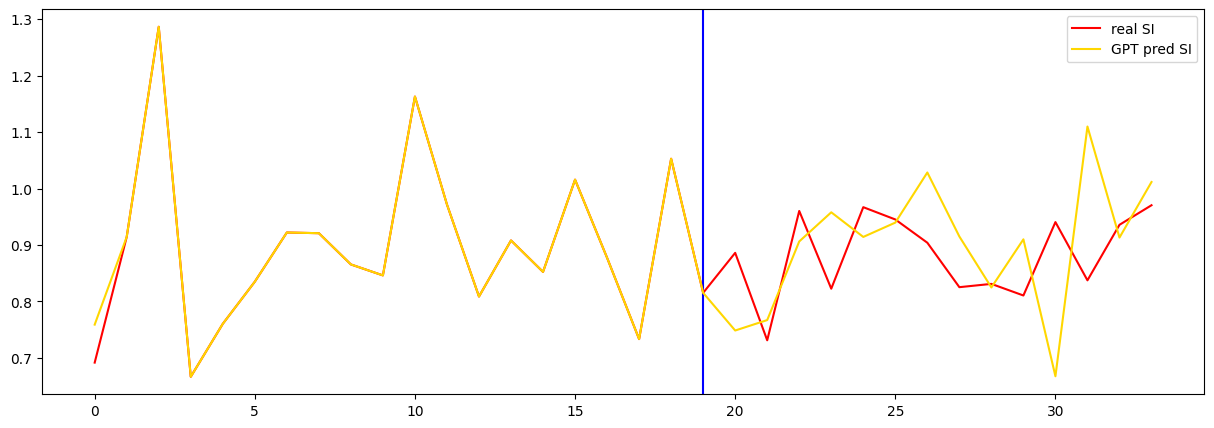

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.2305400371551514
seq length of pred =  30
500 train loss =  2.152921438217163
seq length of pred =  30
1000 train loss =  2.5360682010650635
seq length of pred =  30
1500 train loss =  2.8961713314056396
seq length of pred =  30
2000 train loss =  2.638239860534668
seq length of pred =  30
2500 train loss =  2.4085633754730225
seq length of pred =  30


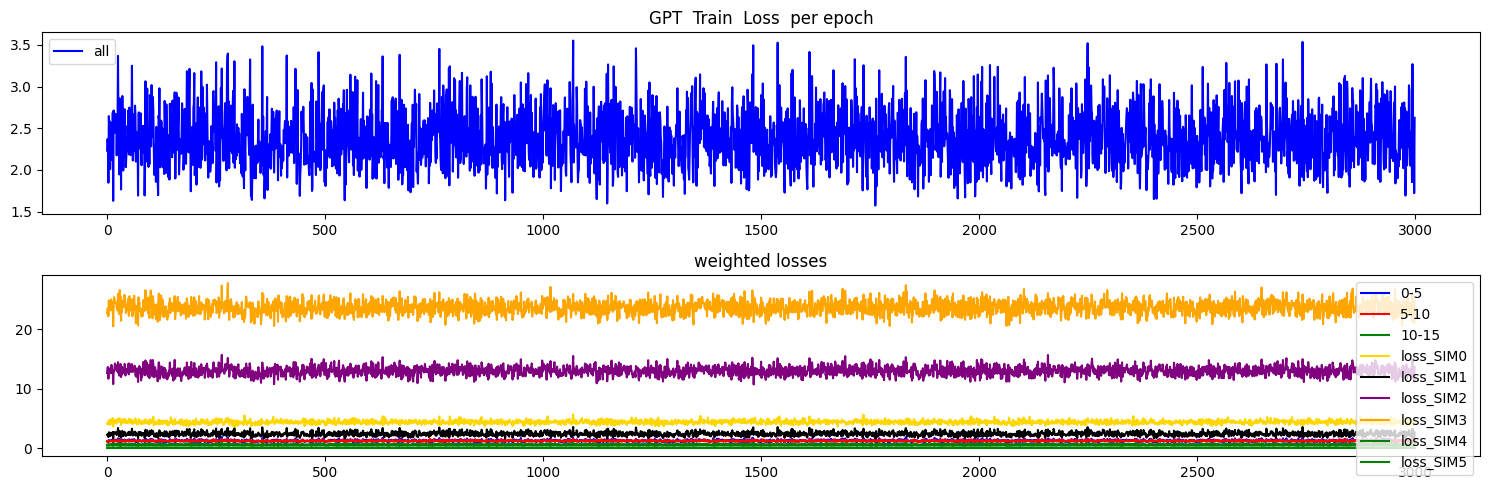

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.09617495536804199
Test MSE Loss - SI only 0-5:  0.0025110398419201374
Test MSE Loss - SI only 5-10:  0.09303802251815796
Test MSE Loss - SI only 10-15:  0.13295571506023407
mae, mse, rmse, mape, mspe, rse, corr
(0.22191285, 0.09617497, 0.3101209, 4.719399, 175.79279, 1.6363915)
Testing R**2 - SI only:  -1.6777771512391118
Testing R**2 - SI only:  -1.6777771512391118
Testing R**2 - All features:  0.9786972072054176
Testing R**2 - (f2) - SI full:  -1.6428825066999697


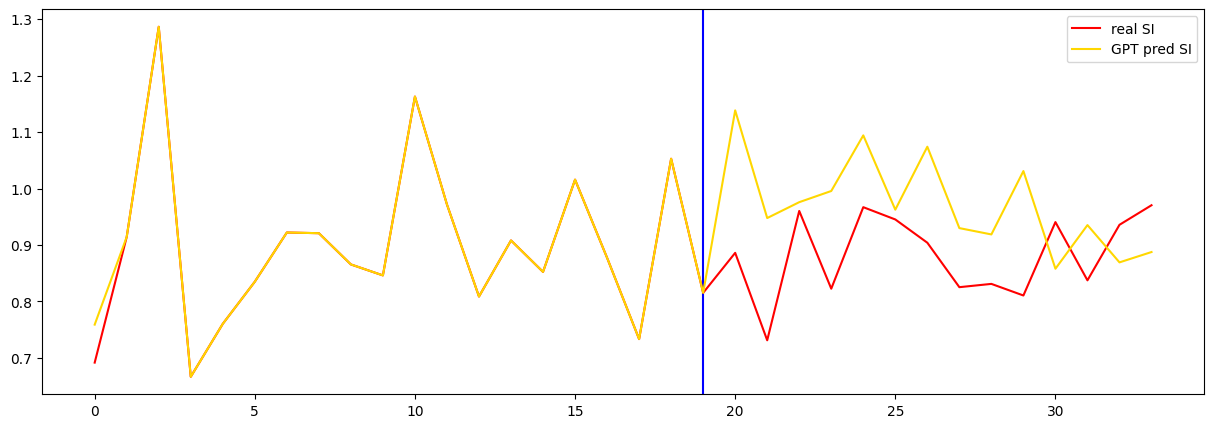

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 2


In [14]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  2.487943649291992
seq length of pred =  30
500 train loss =  2.775513172149658
seq length of pred =  30
1000 train loss =  2.8038837909698486
seq length of pred =  30
1500 train loss =  2.5592727661132812
seq length of pred =  30
2000 train loss =  2.7353131771087646
seq length of pred =  30
2500 train loss =  2.851360321044922
seq length of pred =  30


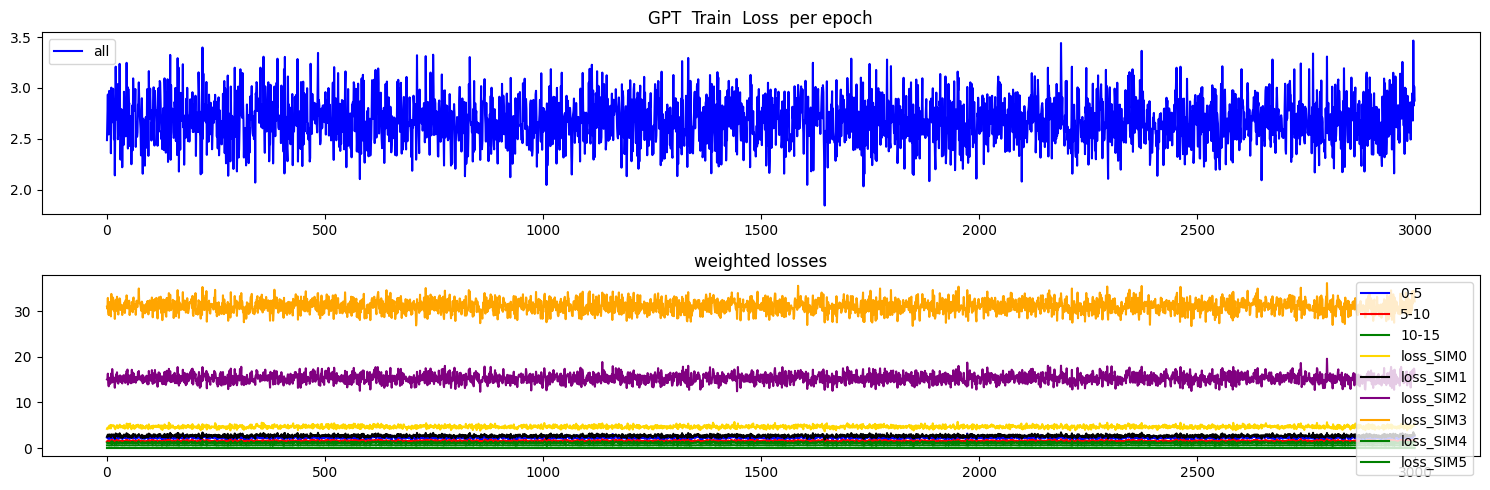

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.08747193962335587
Test MSE Loss - SI only 0-5:  0.2326287031173706
Test MSE Loss - SI only 5-10:  0.16141721606254578
Test MSE Loss - SI only 10-15:  0.027061384171247482
mae, mse, rmse, mape, mspe, rse, corr
(0.21611793, 0.08747194, 0.29575655, 15.390637, 5417.2085, 1.5150344)
Testing R**2 - SI only:  -1.2953291542115082
Testing R**2 - SI only:  -1.2953291542115082
Testing R**2 - All features:  0.9798187013103029
Testing R**2 - (f2) - SI full:  -0.51228622731501


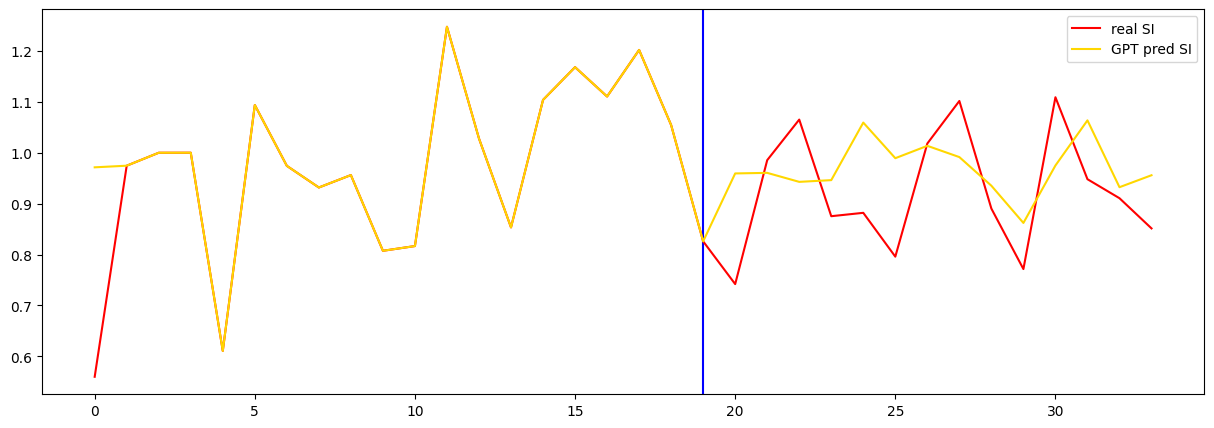

In [15]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.239361047744751
seq length of pred =  30
500 train loss =  2.3755829334259033
seq length of pred =  30
1000 train loss =  2.555098533630371
seq length of pred =  30
1500 train loss =  2.5583174228668213
seq length of pred =  30
2000 train loss =  2.12439227104187
seq length of pred =  30
2500 train loss =  2.6485002040863037
seq length of pred =  30


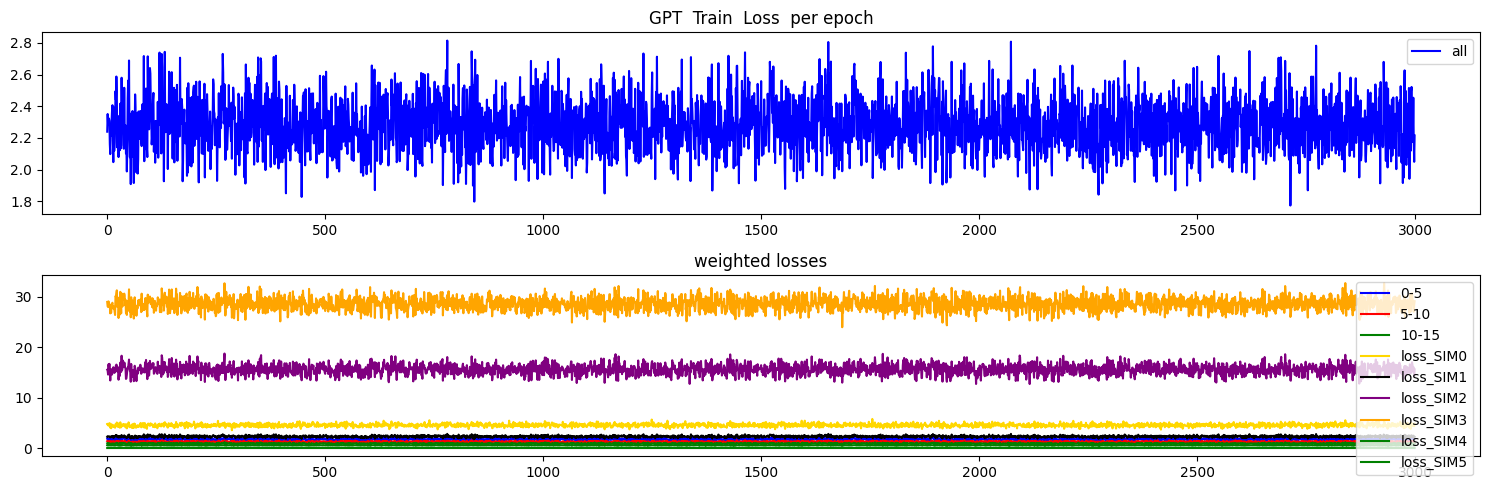

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0789891853928566
Test MSE Loss - SI only 0-5:  0.2326287031173706
Test MSE Loss - SI only 5-10:  0.16141721606254578
Test MSE Loss - SI only 10-15:  0.027061384171247482
mae, mse, rmse, mape, mspe, rse, corr
(0.20522311, 0.07898919, 0.28105018, 15.538835, 5423.8643, 1.4396998)
Testing R**2 - SI only:  -1.0727352863126076
Testing R**2 - SI only:  -1.0727352863126076
Testing R**2 - All features:  0.98546901191355
Testing R**2 - (f2) - SI full:  -0.6365866689292643


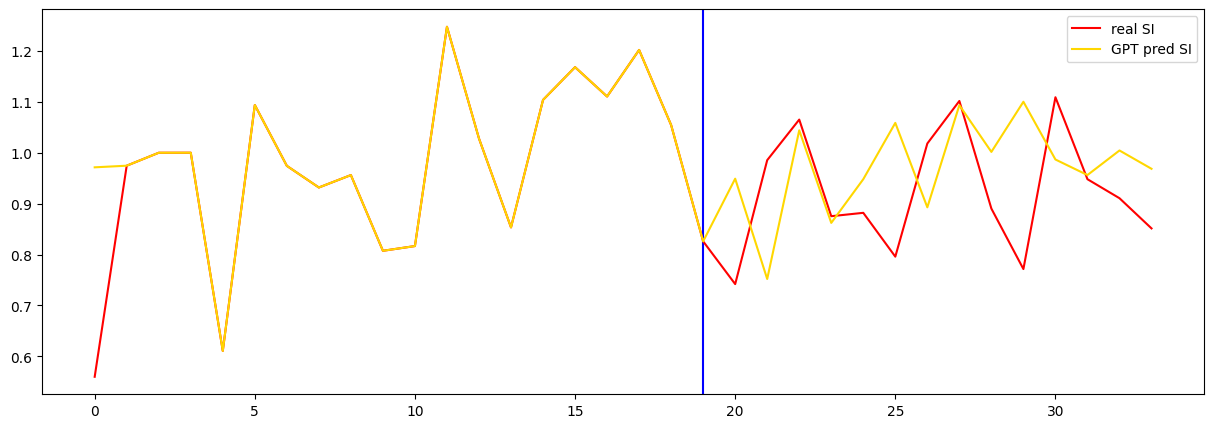

In [16]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.519669532775879
seq length of pred =  30
500 train loss =  1.8086371421813965
seq length of pred =  30
1000 train loss =  2.9400808811187744
seq length of pred =  30
1500 train loss =  2.52532696723938
seq length of pred =  30
2000 train loss =  3.0049729347229004
seq length of pred =  30
2500 train loss =  2.529749870300293
seq length of pred =  30


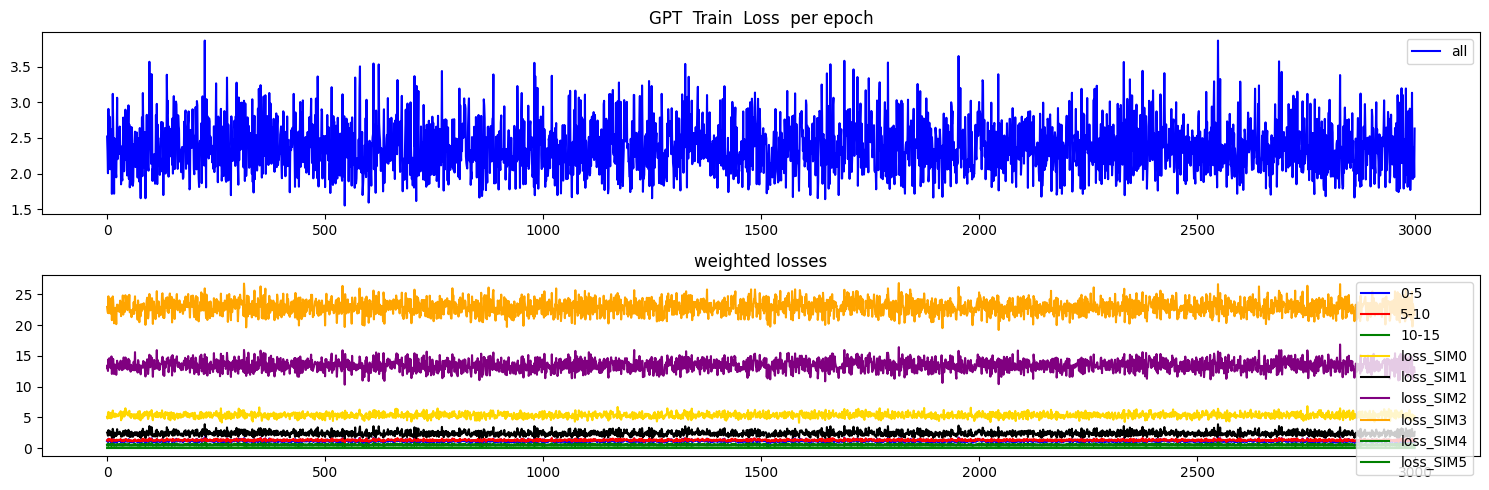

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.09013668447732925
Test MSE Loss - SI only 0-5:  0.2326287031173706
Test MSE Loss - SI only 5-10:  0.16141723096370697
Test MSE Loss - SI only 10-15:  0.027061384171247482
mae, mse, rmse, mape, mspe, rse, corr
(0.22319543, 0.09013669, 0.30022773, 15.801668, 5431.9287, 1.5379384)
Testing R**2 - SI only:  -1.3652539551191096
Testing R**2 - SI only:  -1.3652539551191096
Testing R**2 - All features:  0.9843018098568104
Testing R**2 - (f2) - SI full:  -0.3787341620217861


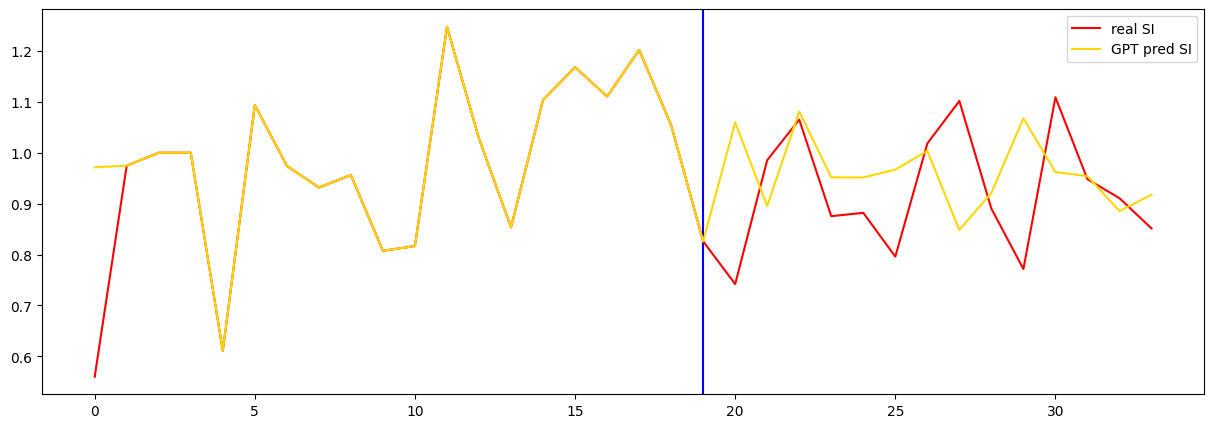

In [17]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.2468316555023193
seq length of pred =  30
500 train loss =  2.4140803813934326
seq length of pred =  30
1000 train loss =  2.358008623123169
seq length of pred =  30
1500 train loss =  2.4479808807373047
seq length of pred =  30
2000 train loss =  2.851585626602173
seq length of pred =  30
2500 train loss =  2.9438161849975586
seq length of pred =  30


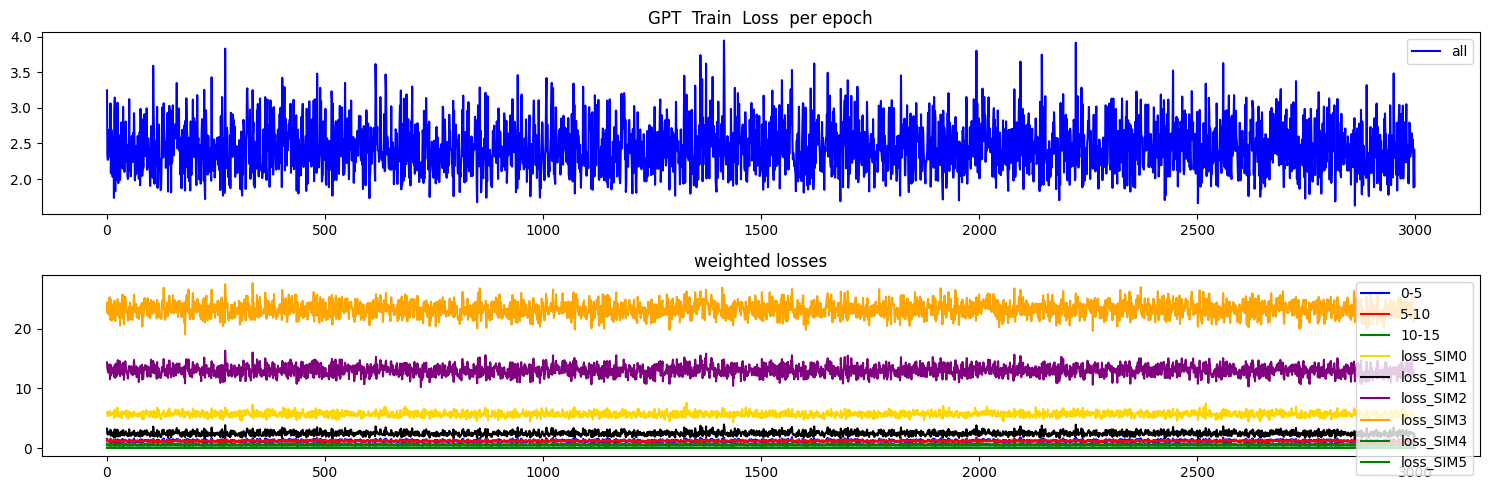

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.07829086482524872
Test MSE Loss - SI only 0-5:  0.2326287031173706
Test MSE Loss - SI only 5-10:  0.16141721606254578
Test MSE Loss - SI only 10-15:  0.027061384171247482
mae, mse, rmse, mape, mspe, rse, corr
(0.20206724, 0.07829087, 0.27980506, 15.357444, 5417.5254, 1.4333217)
Testing R**2 - SI only:  -1.0544110352596325
Testing R**2 - SI only:  -1.0544110352596325
Testing R**2 - All features:  0.9869627405549066
Testing R**2 - (f2) - SI full:  -0.8109605992878626


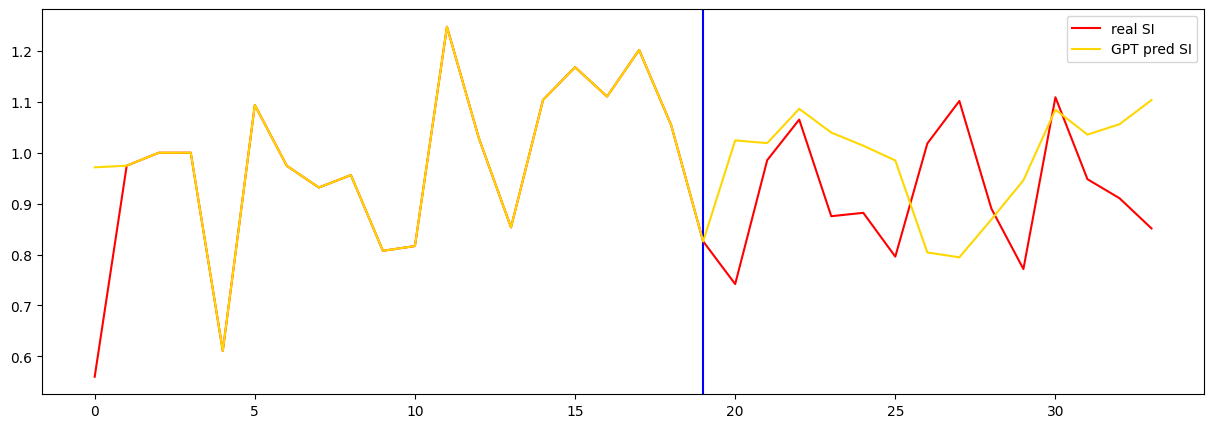

In [18]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 3


In [19]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1.8480446338653564
seq length of pred =  30
500 train loss =  1.937831997871399
seq length of pred =  30
1000 train loss =  1.944625735282898
seq length of pred =  30
1500 train loss =  1.9224133491516113
seq length of pred =  30
2000 train loss =  2.032846450805664
seq length of pred =  30
2500 train loss =  1.961504578590393
seq length of pred =  30


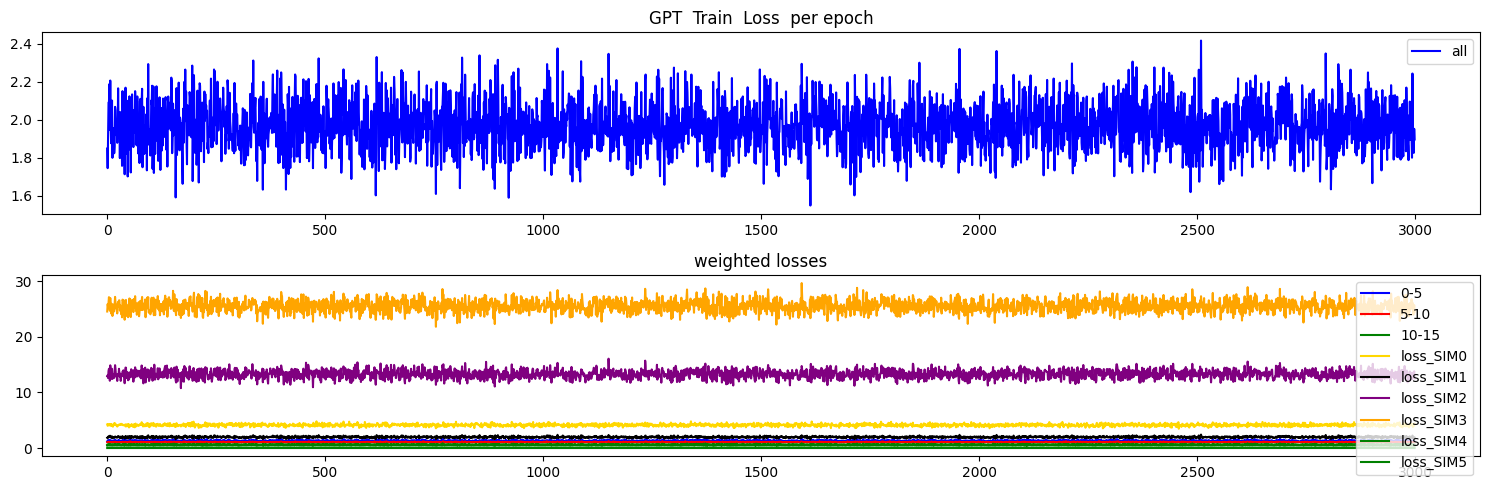

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.1494879424571991
Test MSE Loss - SI only 0-5:  0.18903040885925293
Test MSE Loss - SI only 5-10:  0.17140743136405945
Test MSE Loss - SI only 10-15:  0.18472455441951752
mae, mse, rmse, mape, mspe, rse, corr
(0.3243327, 0.14948793, 0.38663667, 5.324078, 145.78781, 1.6061411)
Testing R**2 - SI only:  -1.5796895335603307
Testing R**2 - SI only:  -1.5796895335603307
Testing R**2 - All features:  0.9687802770318886
Testing R**2 - (f2) - SI full:  -0.36122693517538873


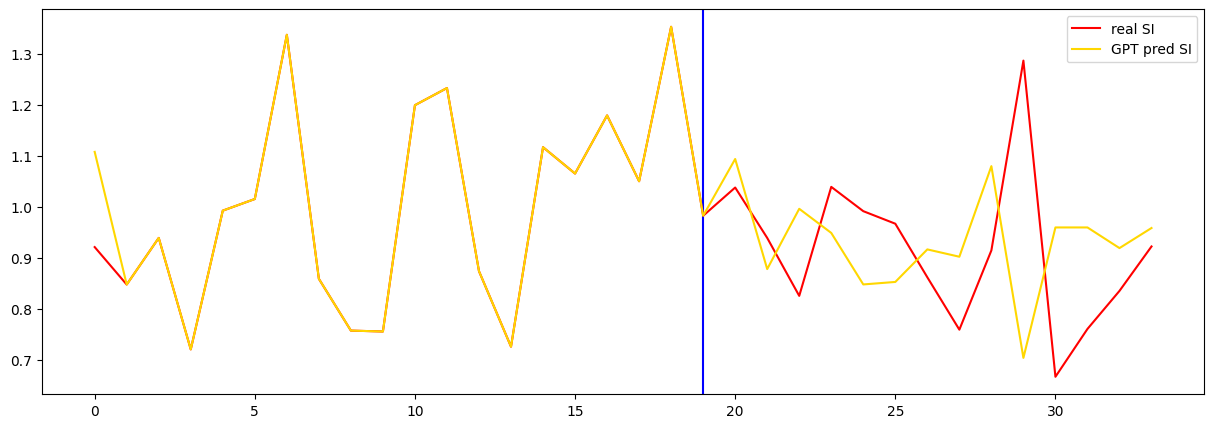

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.775731325149536
seq length of pred =  30
500 train loss =  3.232807159423828
seq length of pred =  30
1000 train loss =  2.1797027587890625
seq length of pred =  30
1500 train loss =  2.325366258621216
seq length of pred =  30
2000 train loss =  2.5933592319488525
seq length of pred =  30
2500 train loss =  2.2916228771209717
seq length of pred =  30


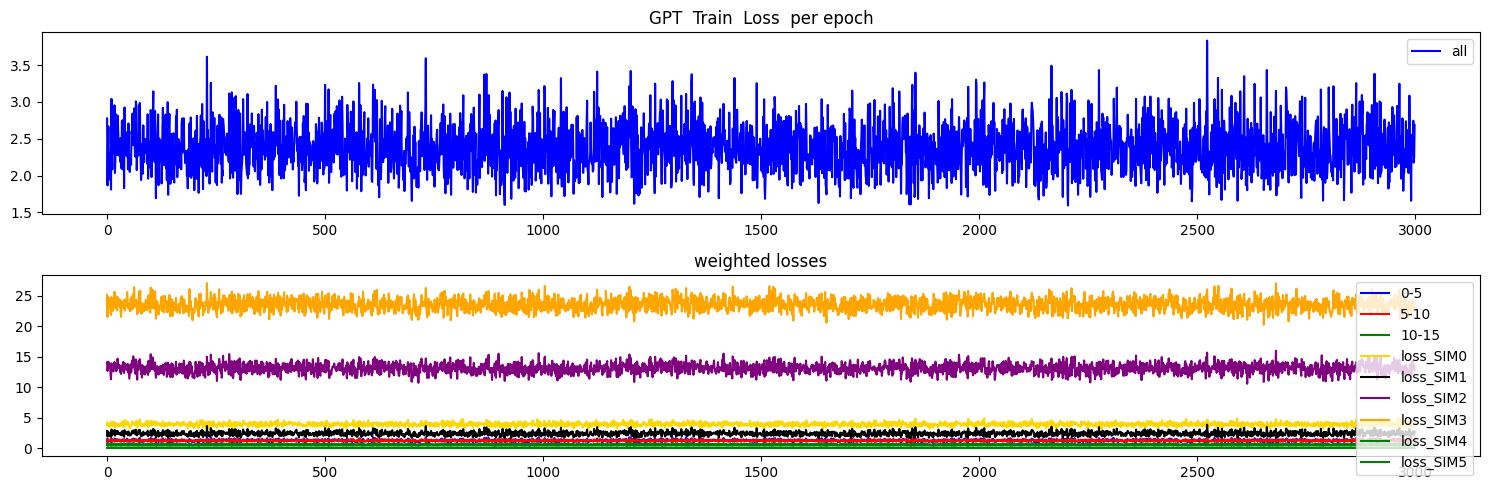

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.13842299580574036
Test MSE Loss - SI only 0-5:  0.18903040885925293
Test MSE Loss - SI only 5-10:  0.17140744626522064
Test MSE Loss - SI only 10-15:  0.18472455441951752
mae, mse, rmse, mape, mspe, rse, corr
(0.3175137, 0.138423, 0.3720524, 7.606117, 487.33945, 1.5455562)
Testing R**2 - SI only:  -1.3887437989070635
Testing R**2 - SI only:  -1.3887437989070635
Testing R**2 - All features:  0.978259011029154
Testing R**2 - (f2) - SI full:  -1.057755239840033


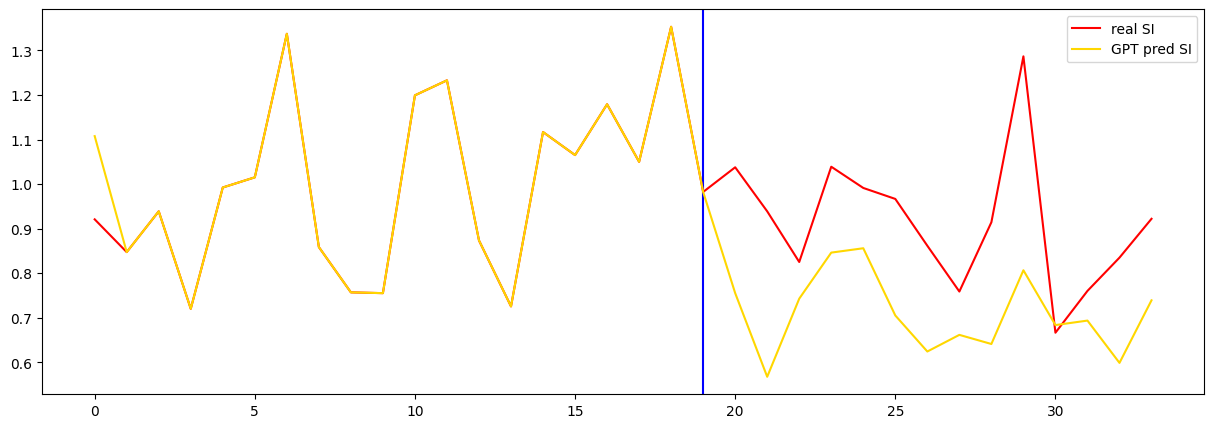

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.593092918395996
seq length of pred =  30
500 train loss =  2.6295275688171387
seq length of pred =  30
1000 train loss =  2.062807321548462
seq length of pred =  30
1500 train loss =  2.380963087081909
seq length of pred =  30
2000 train loss =  2.920173168182373
seq length of pred =  30
2500 train loss =  1.9767780303955078
seq length of pred =  30


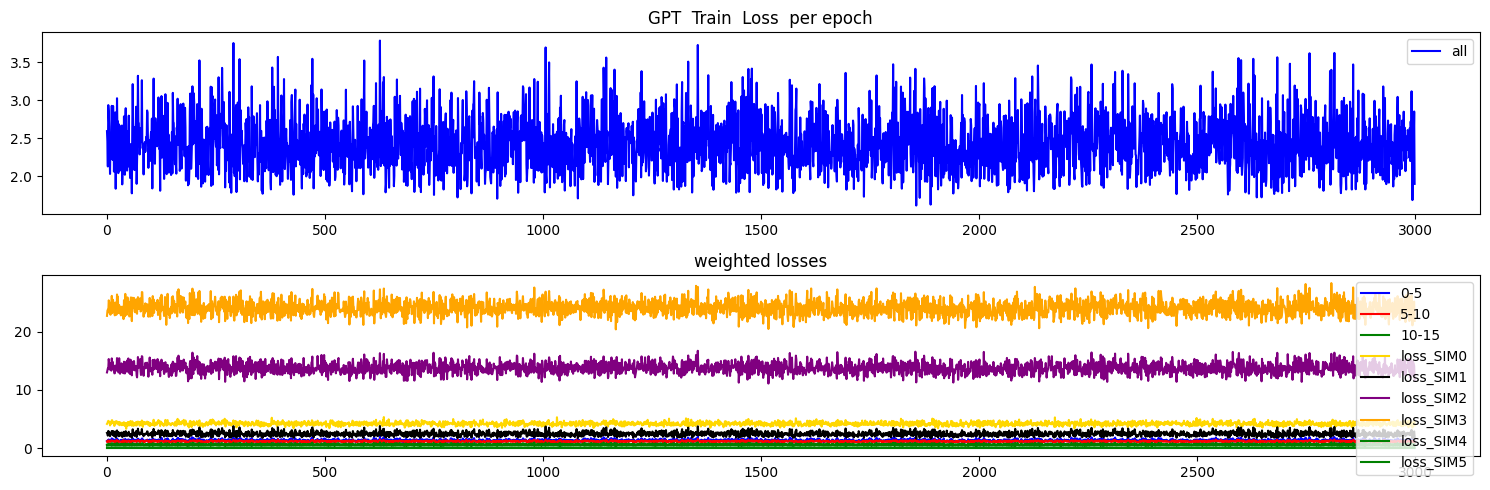

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.13596220314502716
Test MSE Loss - SI only 0-5:  0.18903040885925293
Test MSE Loss - SI only 5-10:  0.17140743136405945
Test MSE Loss - SI only 10-15:  0.18472455441951752
mae, mse, rmse, mape, mspe, rse, corr
(0.31696007, 0.1359622, 0.36873052, 7.208303, 402.41028, 1.5317565)
Testing R**2 - SI only:  -1.3462782555925203
Testing R**2 - SI only:  -1.3462782555925203
Testing R**2 - All features:  0.9743553270453795
Testing R**2 - (f2) - SI full:  -0.6970002279691603


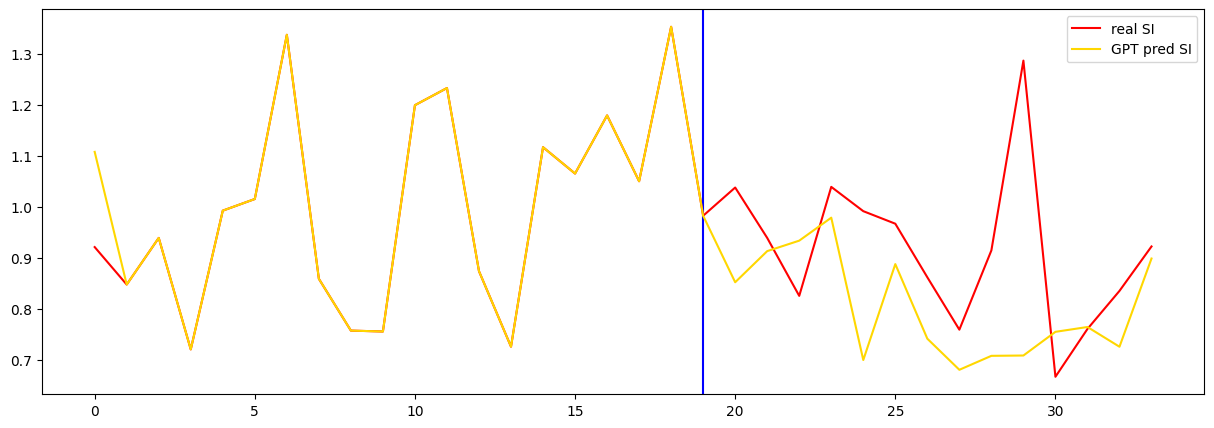

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.144665241241455
seq length of pred =  30
500 train loss =  2.4483845233917236
seq length of pred =  30
1000 train loss =  2.339657783508301
seq length of pred =  30
1500 train loss =  3.1464948654174805
seq length of pred =  30
2000 train loss =  2.0004096031188965
seq length of pred =  30
2500 train loss =  2.3722074031829834
seq length of pred =  30


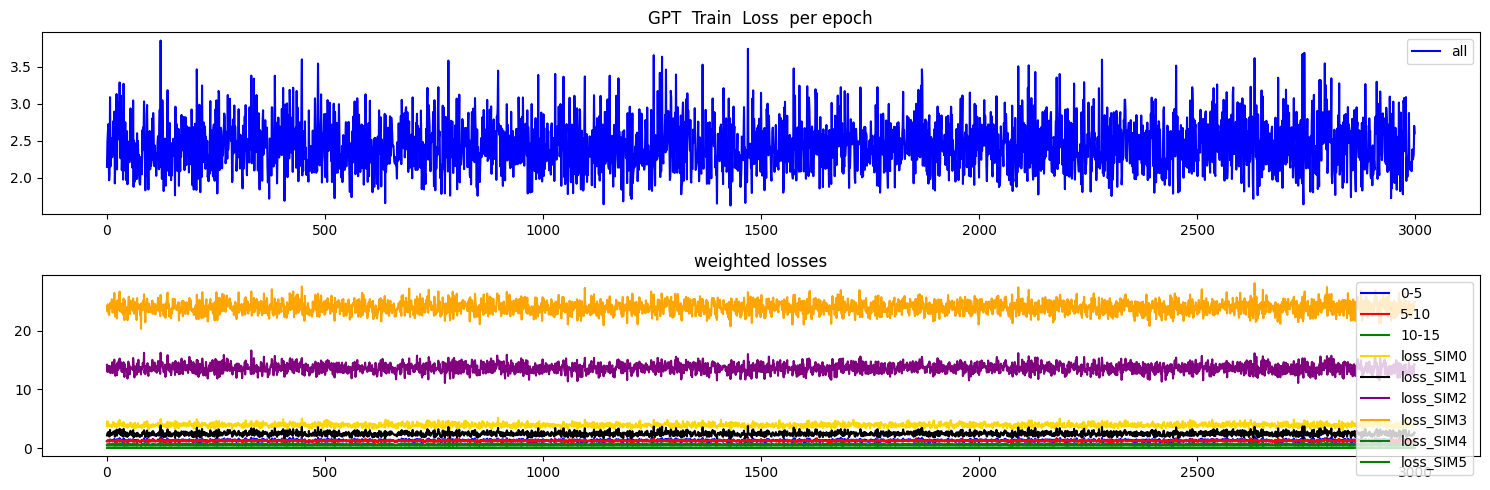

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.13046427071094513
Test MSE Loss - SI only 0-5:  0.18903040885925293
Test MSE Loss - SI only 5-10:  0.17140744626522064
Test MSE Loss - SI only 10-15:  0.18472455441951752
mae, mse, rmse, mape, mspe, rse, corr
(0.3074458, 0.13046426, 0.36119837, 5.8172, 173.3295, 1.500467)
Testing R**2 - SI only:  -1.251401150926033
Testing R**2 - SI only:  -1.251401150926033
Testing R**2 - All features:  0.972812074596431
Testing R**2 - (f2) - SI full:  -0.7305396286851851


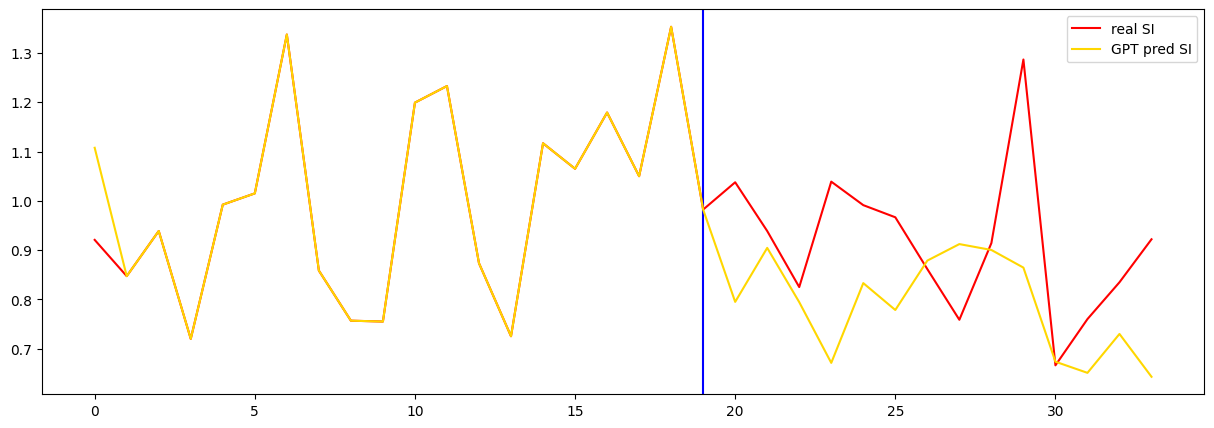

In [23]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 4


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  2.658731698989868
seq length of pred =  30
500 train loss =  2.3857390880584717
seq length of pred =  30
1000 train loss =  2.342679023742676
seq length of pred =  30
1500 train loss =  2.5261178016662598
seq length of pred =  30
2000 train loss =  2.452188491821289
seq length of pred =  30
2500 train loss =  2.2287397384643555
seq length of pred =  30


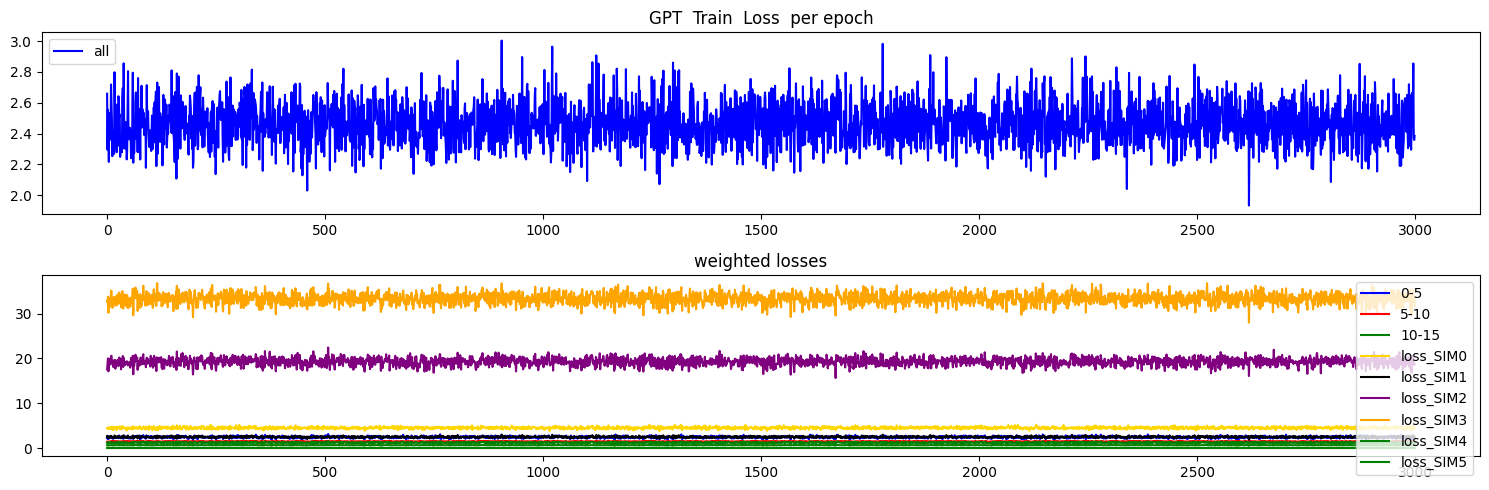

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.09799367934465408
Test MSE Loss - SI only 0-5:  0.02506529726088047
Test MSE Loss - SI only 5-10:  0.08001891523599625
Test MSE Loss - SI only 10-15:  0.14238151907920837
mae, mse, rmse, mape, mspe, rse, corr
(0.22754945, 0.09799369, 0.31303942, 4.9808416, 197.58264, 1.6662471)
Testing R**2 - SI only:  -1.7763792134848346
Testing R**2 - SI only:  -1.7763792134848346
Testing R**2 - All features:  0.9953160615691061
Testing R**2 - (f2) - SI full:  -1.4255176237299545


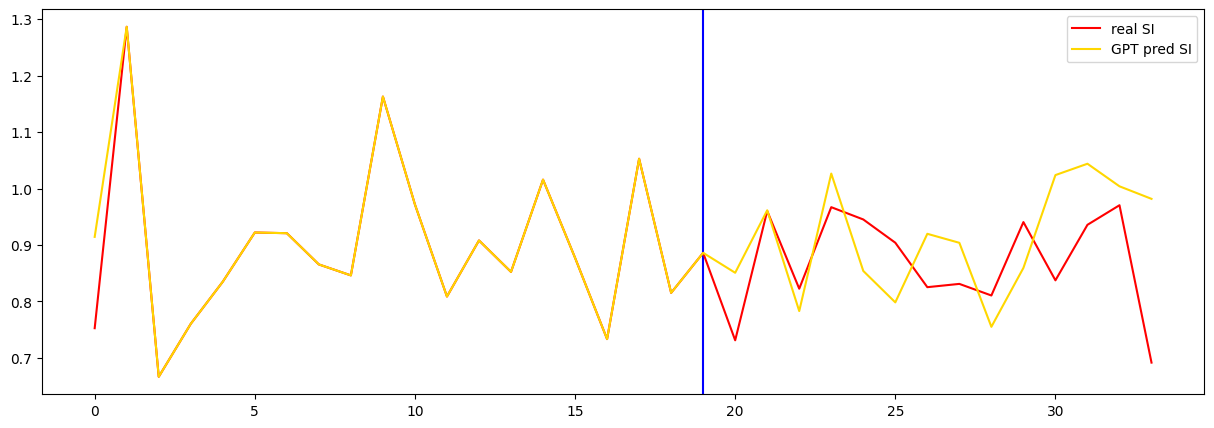

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.551036834716797
seq length of pred =  30
500 train loss =  2.7454733848571777
seq length of pred =  30
1000 train loss =  2.424204111099243
seq length of pred =  30
1500 train loss =  2.867339849472046
seq length of pred =  30
2000 train loss =  2.4295430183410645
seq length of pred =  30
2500 train loss =  2.973850965499878
seq length of pred =  30


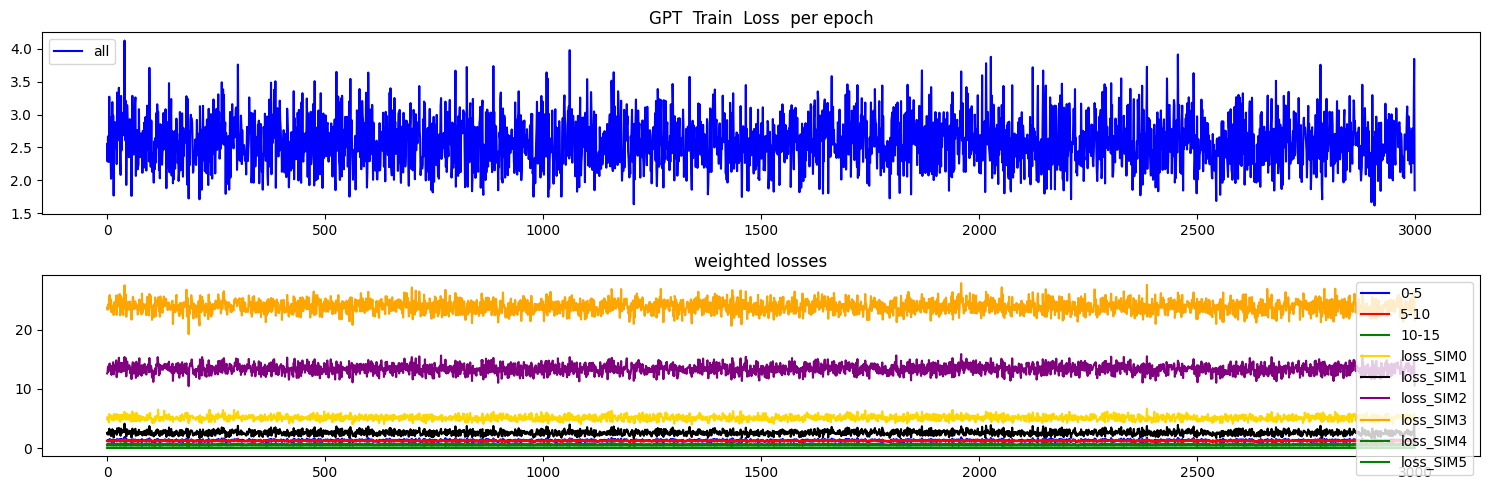

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.09464605897665024
Test MSE Loss - SI only 0-5:  0.02506529726088047
Test MSE Loss - SI only 5-10:  0.08001891523599625
Test MSE Loss - SI only 10-15:  0.14238151907920837
mae, mse, rmse, mape, mspe, rse, corr
(0.21698849, 0.09464606, 0.307646, 4.215716, 166.40831, 1.6375389)
Testing R**2 - SI only:  -1.6815337717988408
Testing R**2 - SI only:  -1.6815337717988408
Testing R**2 - All features:  0.9913075125656532
Testing R**2 - (f2) - SI full:  -1.466313484202431


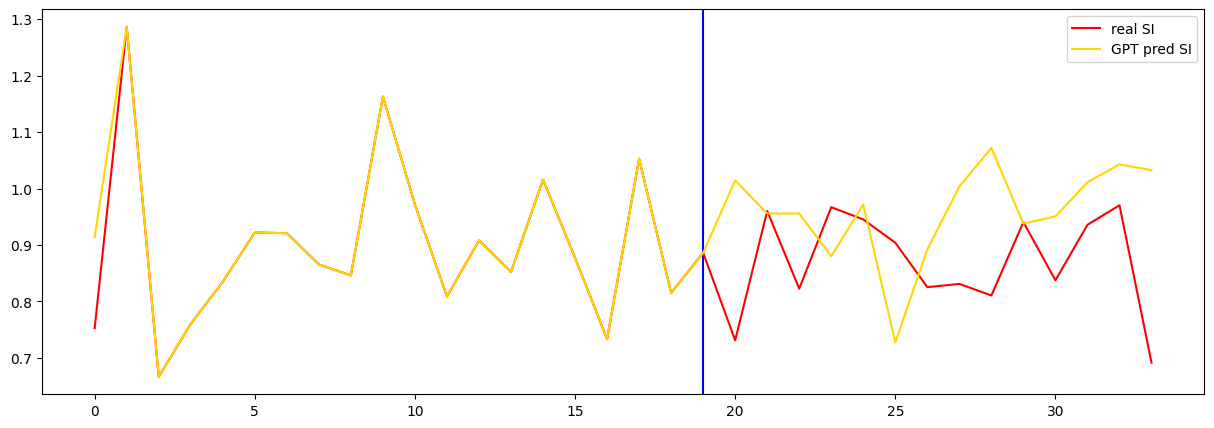

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.1178810596466064
seq length of pred =  30
500 train loss =  2.269207000732422
seq length of pred =  30
1000 train loss =  2.884503126144409
seq length of pred =  30
1500 train loss =  2.5657386779785156
seq length of pred =  30
2000 train loss =  2.537257194519043
seq length of pred =  30
2500 train loss =  2.031522512435913
seq length of pred =  30


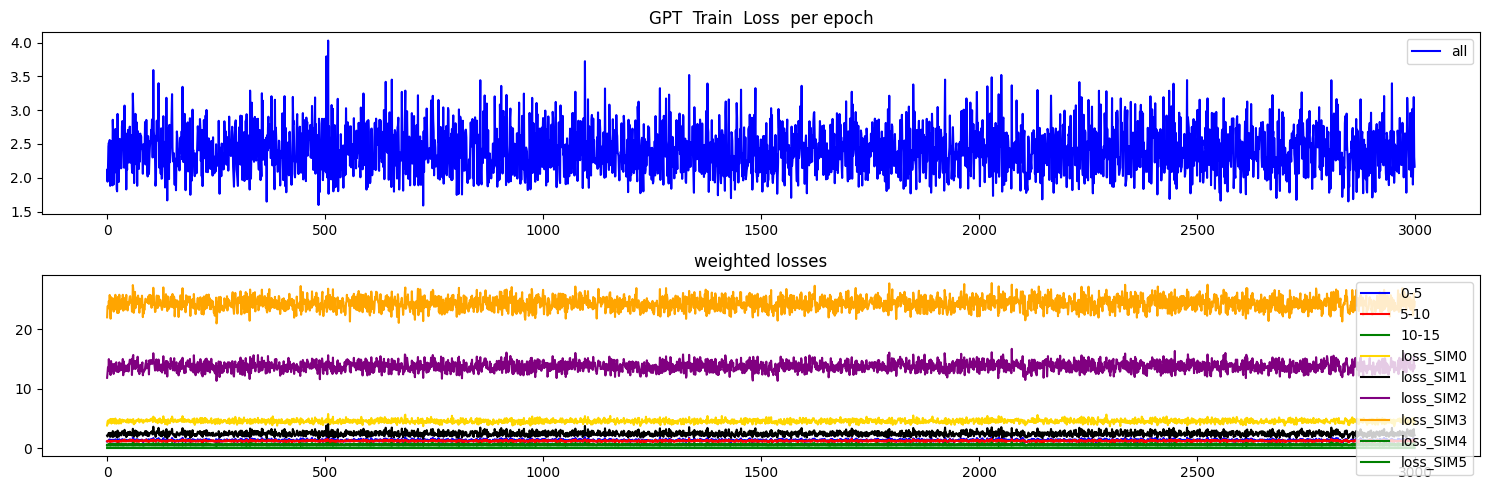

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0937814936041832
Test MSE Loss - SI only 0-5:  0.02506529726088047
Test MSE Loss - SI only 5-10:  0.08001891523599625
Test MSE Loss - SI only 10-15:  0.14238151907920837
mae, mse, rmse, mape, mspe, rse, corr
(0.21134265, 0.093781486, 0.30623764, 3.7370777, 160.79166, 1.6300424)
Testing R**2 - SI only:  -1.657038169455972
Testing R**2 - SI only:  -1.657038169455972
Testing R**2 - All features:  0.9977989312893458
Testing R**2 - (f2) - SI full:  -1.4628110382716288


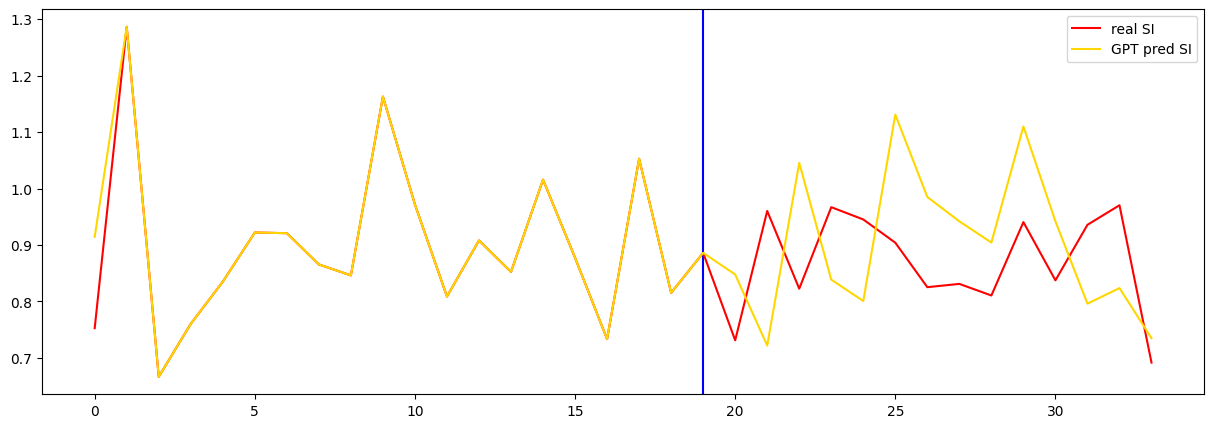

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.4710988998413086
seq length of pred =  30
500 train loss =  2.4183032512664795
seq length of pred =  30
1000 train loss =  2.4976260662078857
seq length of pred =  30
1500 train loss =  2.456611394882202
seq length of pred =  30
2000 train loss =  2.4398226737976074
seq length of pred =  30
2500 train loss =  2.6387786865234375
seq length of pred =  30


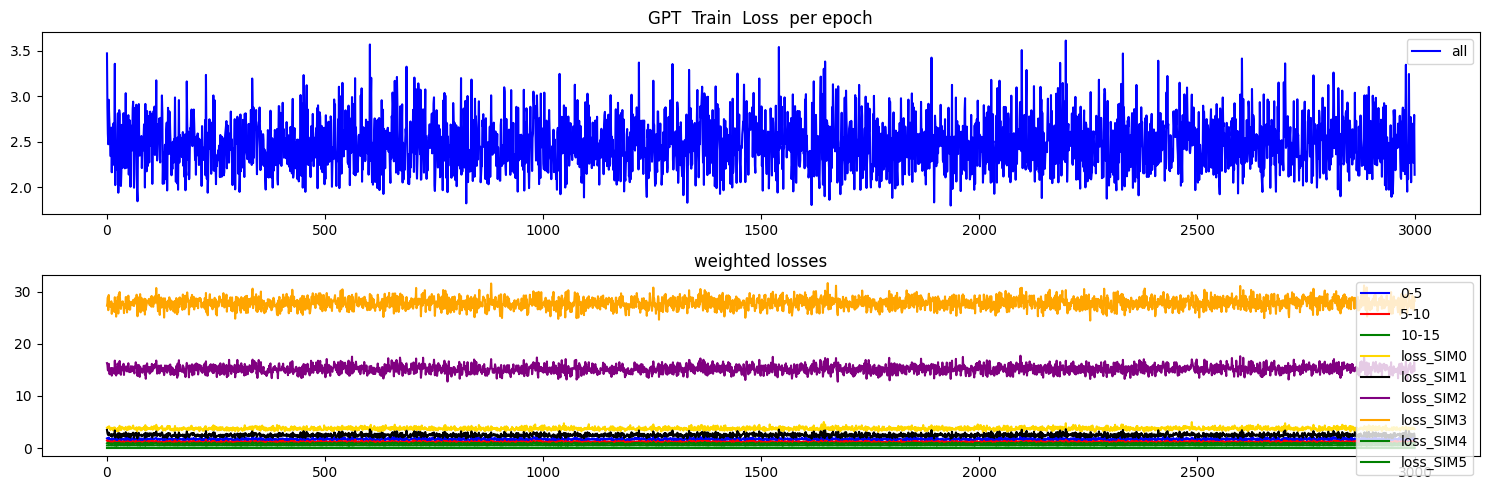

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0942266583442688
Test MSE Loss - SI only 0-5:  0.02506529726088047
Test MSE Loss - SI only 5-10:  0.08001891523599625
Test MSE Loss - SI only 10-15:  0.14238151907920837
mae, mse, rmse, mape, mspe, rse, corr
(0.2165294, 0.09422664, 0.3069636, 4.3543878, 169.52847, 1.6339066)
Testing R**2 - SI only:  -1.6696503670190777
Testing R**2 - SI only:  -1.6696503670190777
Testing R**2 - All features:  0.9929575718819967
Testing R**2 - (f2) - SI full:  -1.8168768626656773


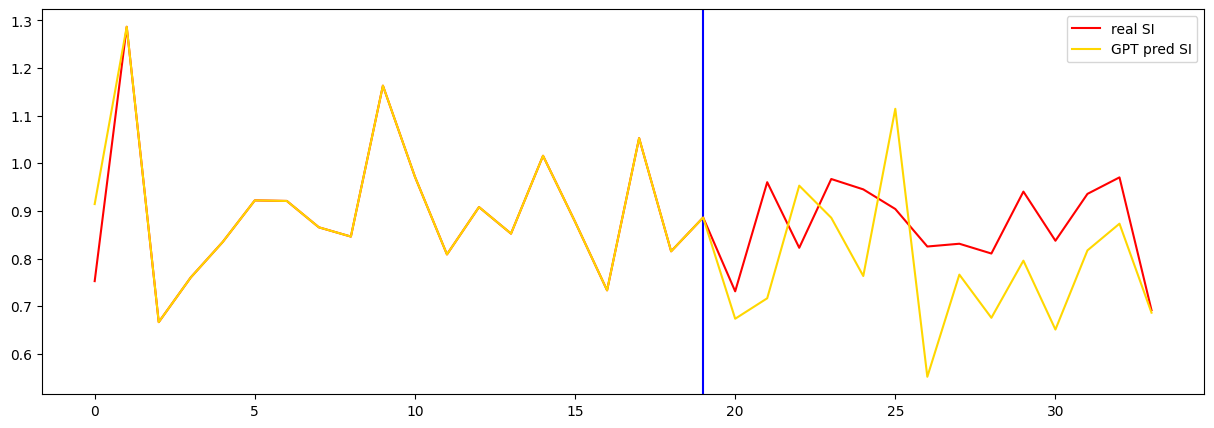

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 5


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  2.5970213413238525
seq length of pred =  30
500 train loss =  2.9398536682128906
seq length of pred =  30
1000 train loss =  2.771648406982422
seq length of pred =  30
1500 train loss =  2.9124484062194824
seq length of pred =  30
2000 train loss =  2.606938362121582
seq length of pred =  30
2500 train loss =  2.708606481552124
seq length of pred =  30


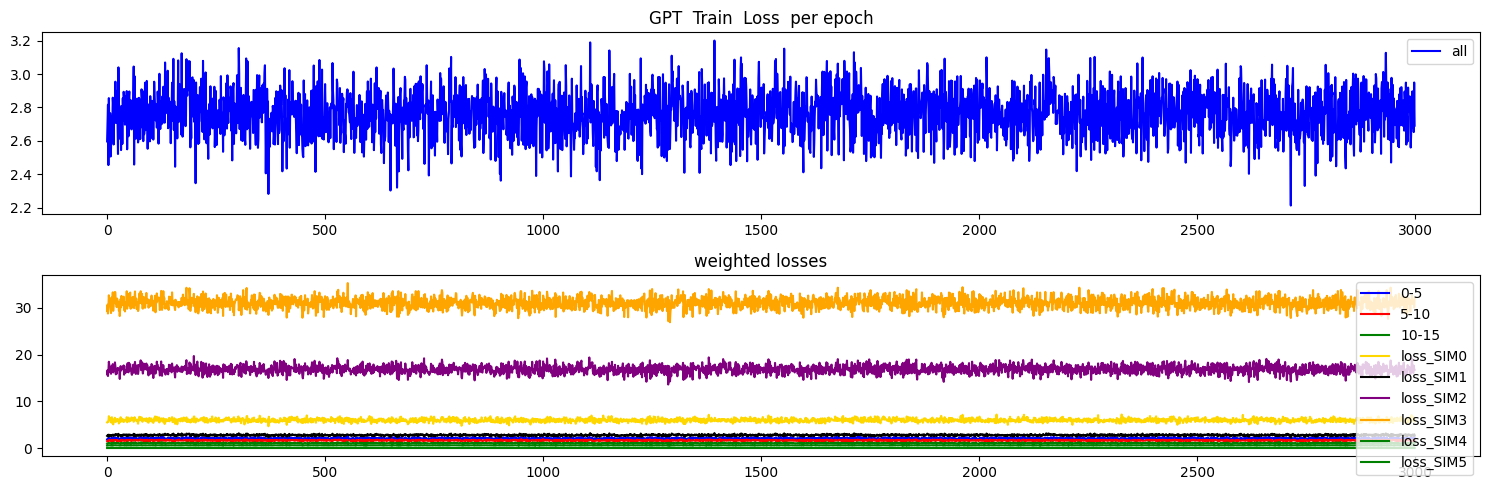

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.037709642201662064
Test MSE Loss - SI only 0-5:  0.04466373473405838
Test MSE Loss - SI only 5-10:  0.053401947021484375
Test MSE Loss - SI only 10-15:  0.02448127605021
mae, mse, rmse, mape, mspe, rse, corr
(0.16138361, 0.037709635, 0.19418968, 32.131634, 26130.457, 1.5441648)
Testing R**2 - SI only:  -1.3844449019608192
Testing R**2 - SI only:  -1.3844449019608192
Testing R**2 - All features:  0.9874361490612067
Testing R**2 - (f2) - SI full:  -0.24904583732335595


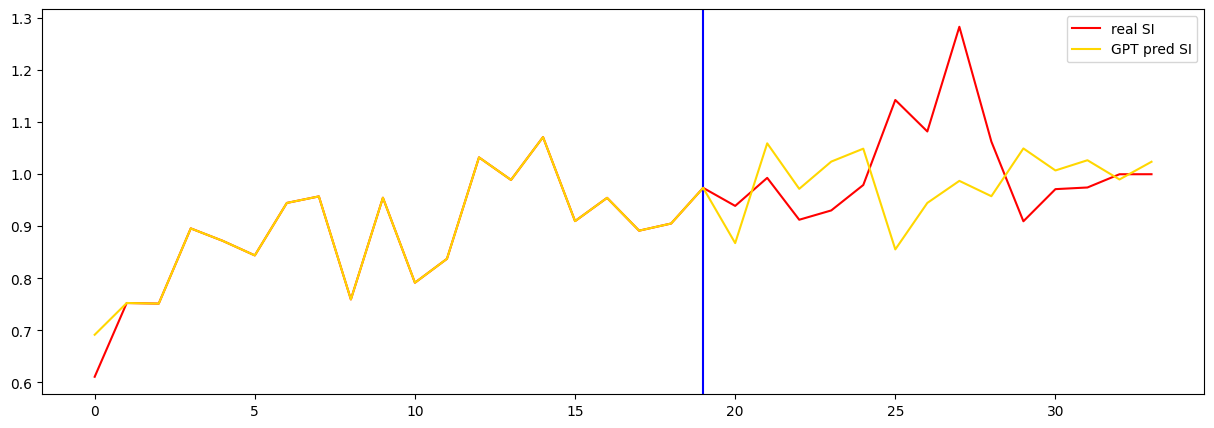

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.4896793365478516
seq length of pred =  30
500 train loss =  2.572409152984619
seq length of pred =  30
1000 train loss =  2.756032705307007
seq length of pred =  30
1500 train loss =  2.5192348957061768
seq length of pred =  30
2000 train loss =  2.5828614234924316
seq length of pred =  30
2500 train loss =  2.602447748184204
seq length of pred =  30


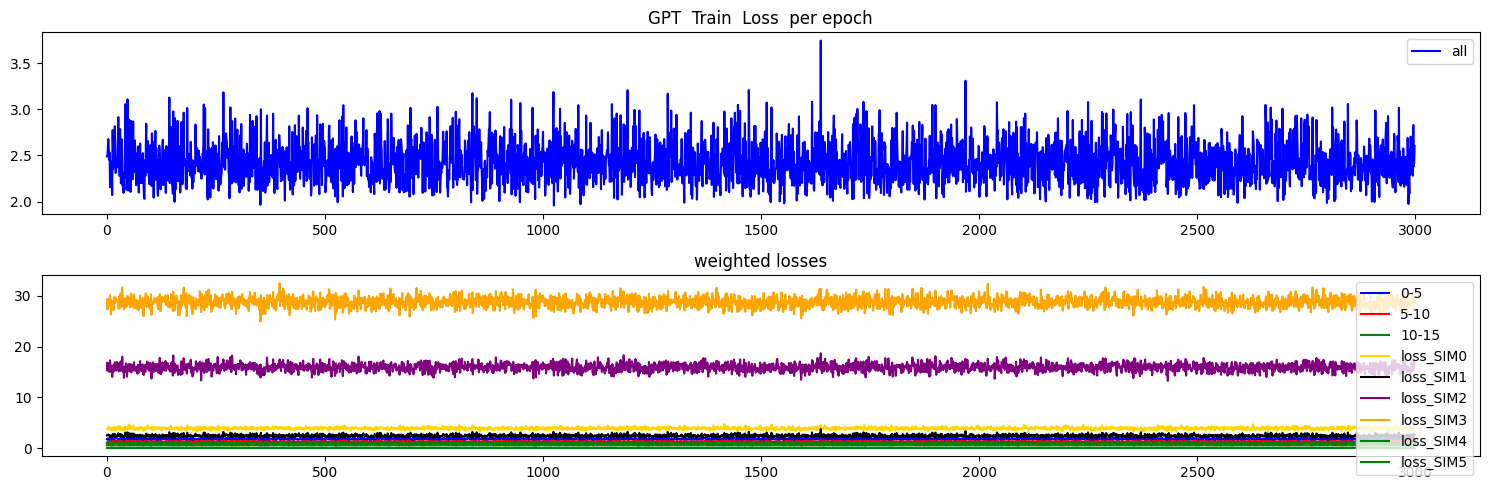

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.052828144282102585
Test MSE Loss - SI only 0-5:  0.04466373473405838
Test MSE Loss - SI only 5-10:  0.053401947021484375
Test MSE Loss - SI only 10-15:  0.02448127605021
mae, mse, rmse, mape, mspe, rse, corr
(0.19580998, 0.05282815, 0.22984375, 90.59655, 243555.47, 1.82768)
Testing R**2 - SI only:  -2.3404142600665145
Testing R**2 - SI only:  -2.3404142600665145
Testing R**2 - All features:  0.9824331586609538
Testing R**2 - (f2) - SI full:  -1.0013607493149919


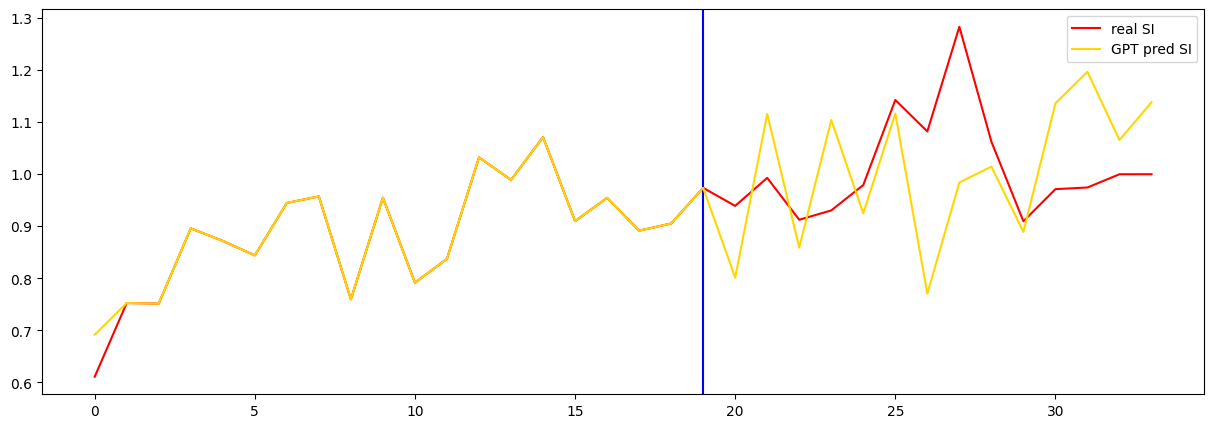

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.4627058506011963
seq length of pred =  30
500 train loss =  2.2435708045959473
seq length of pred =  30
1000 train loss =  2.645238161087036
seq length of pred =  30
1500 train loss =  2.491947650909424
seq length of pred =  30
2000 train loss =  2.3089439868927
seq length of pred =  30
2500 train loss =  2.837942600250244
seq length of pred =  30


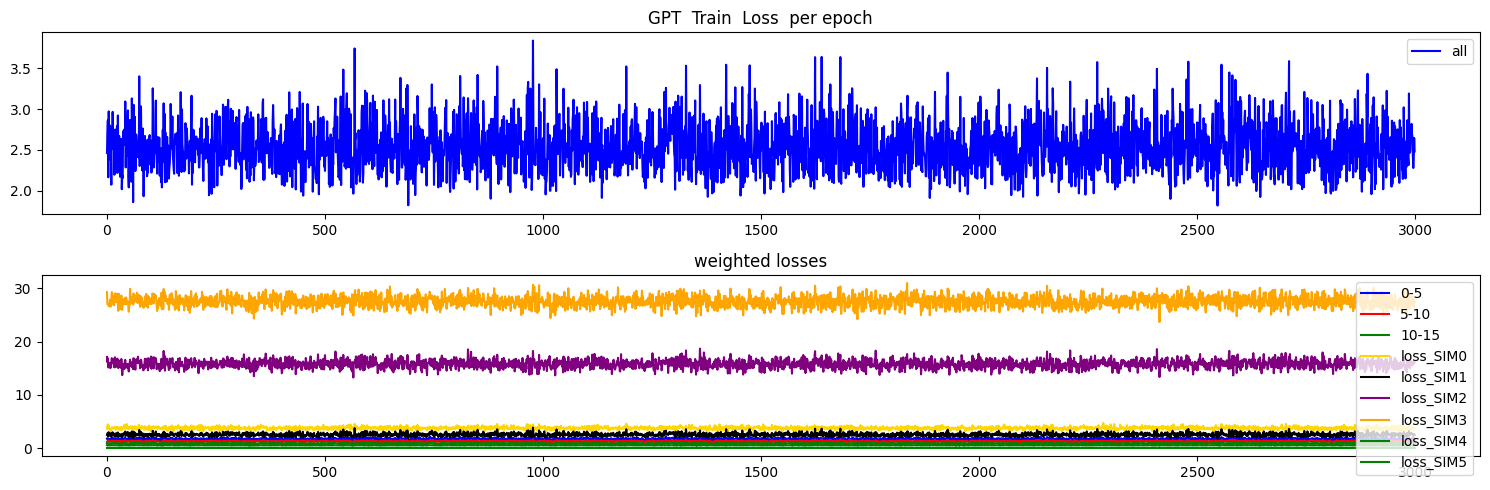

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.03783212602138519
Test MSE Loss - SI only 0-5:  0.04466373473405838
Test MSE Loss - SI only 5-10:  0.053401947021484375
Test MSE Loss - SI only 10-15:  0.02448127605021
mae, mse, rmse, mape, mspe, rse, corr
(0.16624787, 0.03783213, 0.19450483, 43.188507, 51292.215, 1.5466708)
Testing R**2 - SI only:  -1.392190249232165
Testing R**2 - SI only:  -1.392190249232165
Testing R**2 - All features:  0.9914609946601061
Testing R**2 - (f2) - SI full:  -1.0547970264130724


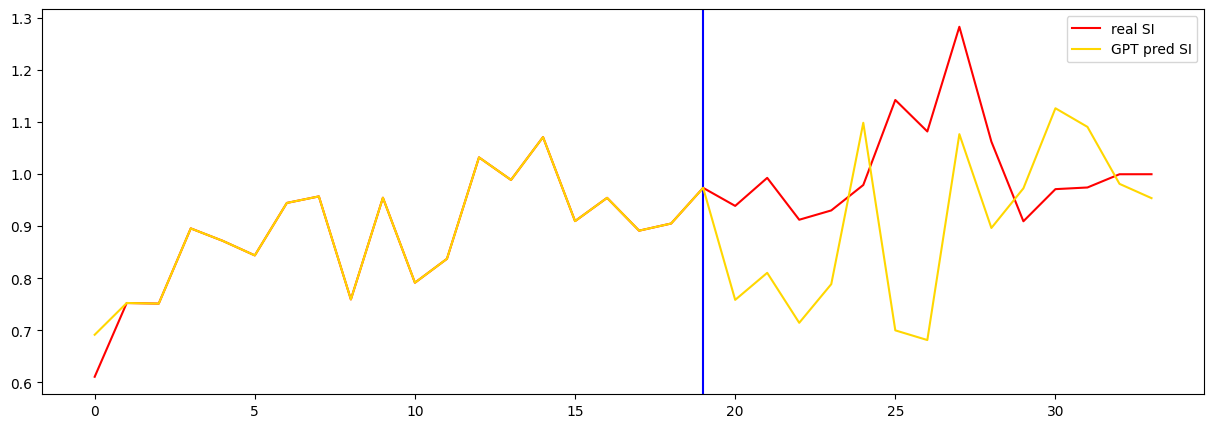

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  2.5985260009765625
seq length of pred =  30
500 train loss =  2.607452154159546
seq length of pred =  30
1000 train loss =  2.8354218006134033
seq length of pred =  30
1500 train loss =  2.3127660751342773
seq length of pred =  30
2000 train loss =  2.7500133514404297
seq length of pred =  30
2500 train loss =  2.707402229309082
seq length of pred =  30


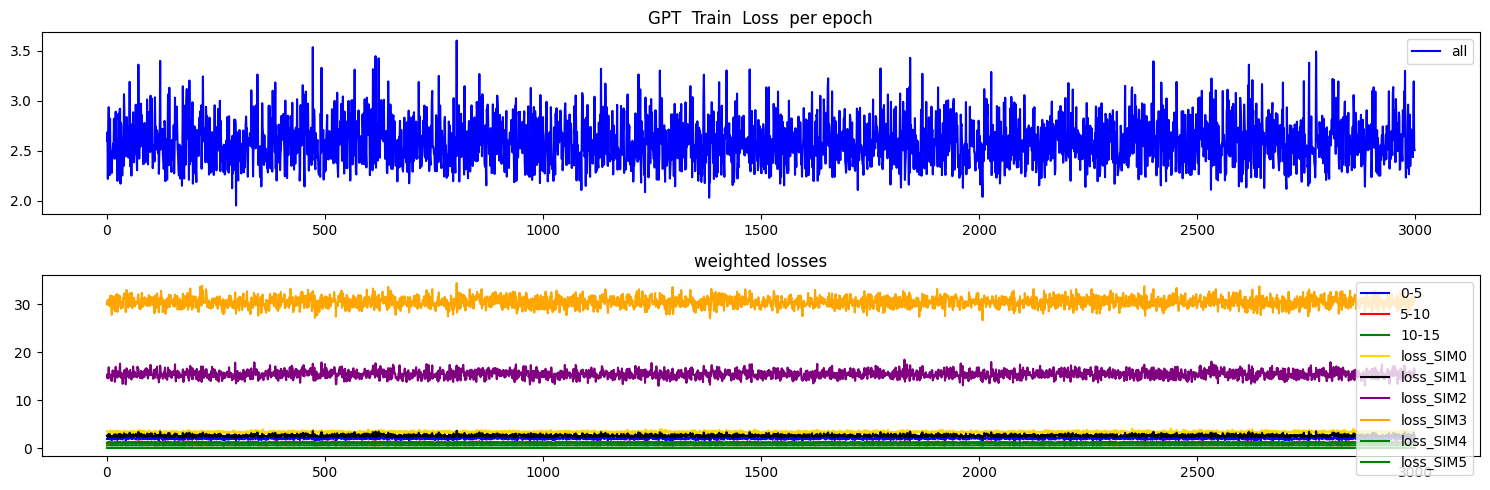

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.032195139676332474
Test MSE Loss - SI only 0-5:  0.04466373473405838
Test MSE Loss - SI only 5-10:  0.053401947021484375
Test MSE Loss - SI only 10-15:  0.02448127605021
mae, mse, rmse, mape, mspe, rse, corr
(0.14455011, 0.03219514, 0.17943004, 71.96163, 151176.12, 1.4267985)
Testing R**2 - SI only:  -1.035753887651996
Testing R**2 - SI only:  -1.035753887651996
Testing R**2 - All features:  0.9924861732947116
Testing R**2 - (f2) - SI full:  -1.8794423544060517


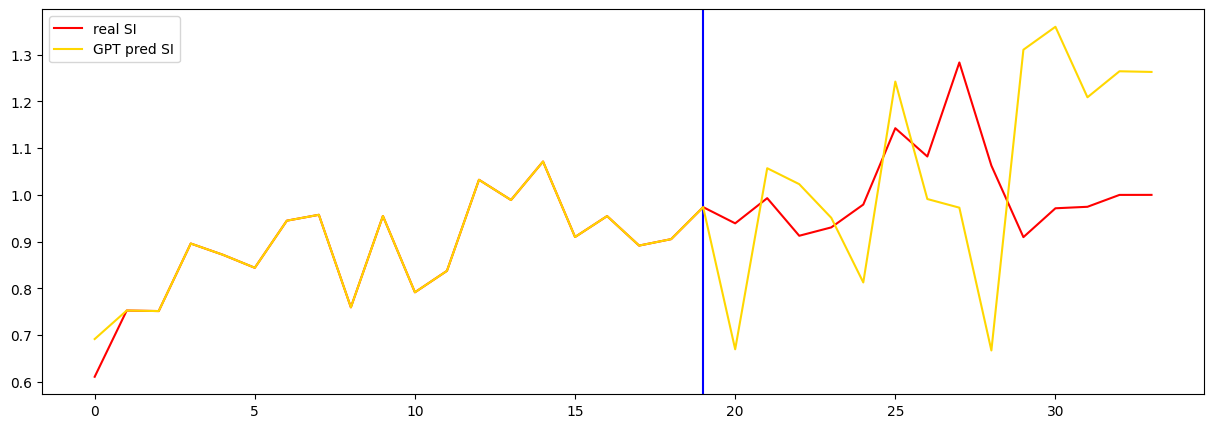

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  3.564202070236206
seq length of pred =  30
500 train loss =  3.178072929382324
seq length of pred =  30
1000 train loss =  3.374176502227783
seq length of pred =  30
1500 train loss =  3.4752604961395264
seq length of pred =  30
2000 train loss =  2.5907206535339355
seq length of pred =  30
2500 train loss =  2.7399961948394775
seq length of pred =  30


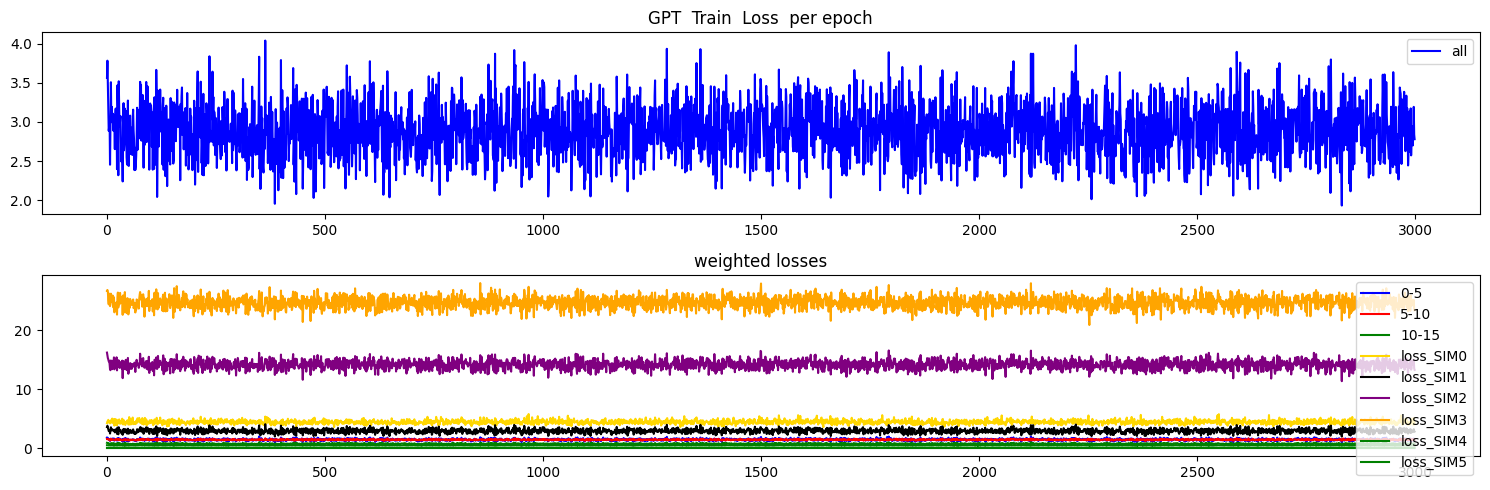

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.09148009866476059
Test MSE Loss - SI only 0-5:  0.10380108654499054
Test MSE Loss - SI only 5-10:  0.11293947696685791
Test MSE Loss - SI only 10-15:  0.09235255420207977
mae, mse, rmse, mape, mspe, rse, corr
(0.21671517, 0.091480106, 0.3024568, 10.64952, 1404.6223, 1.0875639)
Testing R**2 - SI only:  -0.1827950474457556
Testing R**2 - SI only:  -0.1827950474457556
Testing R**2 - All features:  0.9039856844473989
Testing R**2 - (f2) - SI full:  -0.2778065122885742


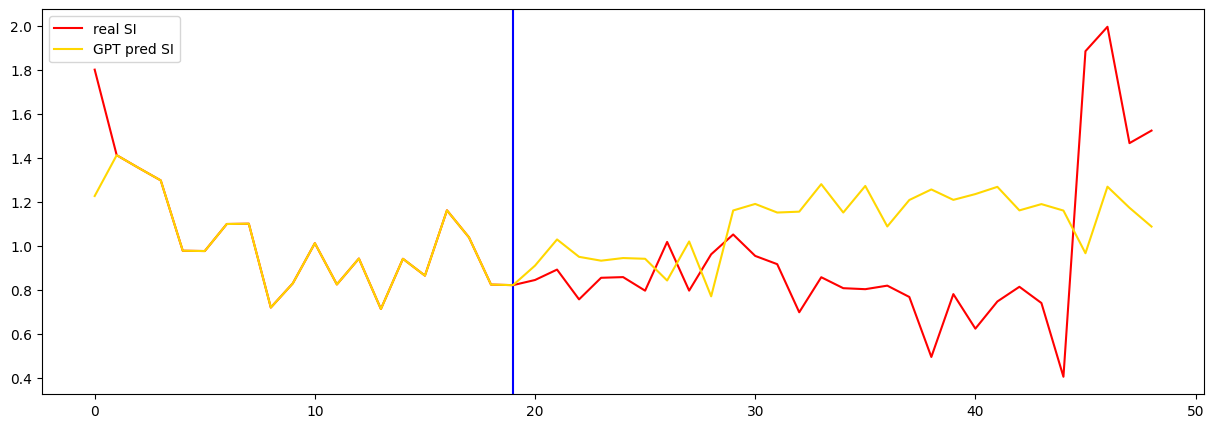

In [34]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


0 train loss =  2.481335163116455
seq length of pred =  30
500 train loss =  2.629028081893921
seq length of pred =  30
1000 train loss =  3.0427565574645996
seq length of pred =  30
1500 train loss =  3.0116944313049316
seq length of pred =  30
2000 train loss =  2.1484487056732178
seq length of pred =  30
2500 train loss =  2.770939350128174
seq length of pred =  30


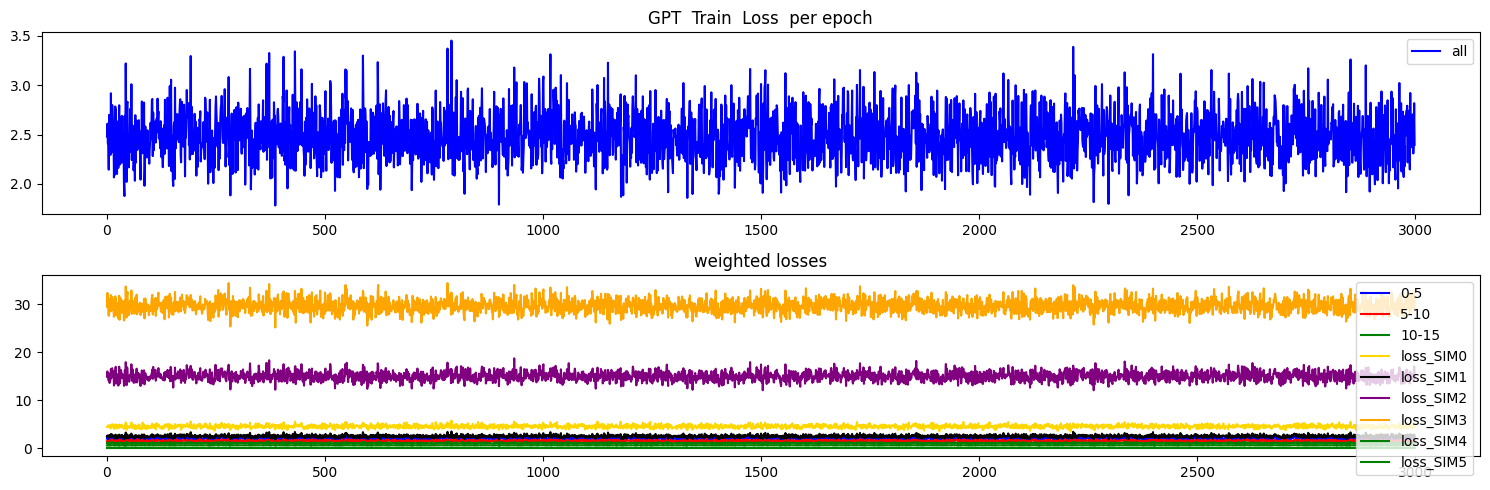

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.011782081797719002
Test MSE Loss - SI only 0-5:  0.009706692770123482
Test MSE Loss - SI only 5-10:  0.0006717772339470685
Test MSE Loss - SI only 10-15:  0.0312558189034462
mae, mse, rmse, mape, mspe, rse, corr
(0.08354826, 0.011782082, 0.108545296, 2.1461277, 21.271364, 1.3416814)
Testing R**2 - SI only:  -0.8001090251218184
Testing R**2 - SI only:  -0.8001090251218184
Testing R**2 - All features:  0.9966536975533246
Testing R**2 - (f2) - SI full:  -1.0207577467070532


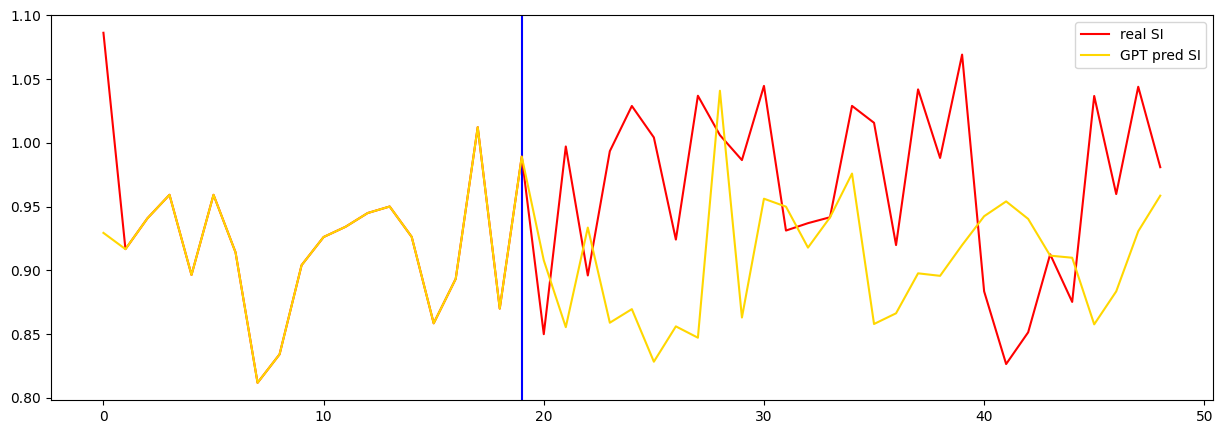

In [35]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


0 train loss =  3.0256600379943848
seq length of pred =  30
500 train loss =  3.1967175006866455
seq length of pred =  30
1000 train loss =  3.052612066268921
seq length of pred =  30
1500 train loss =  3.0228543281555176
seq length of pred =  30
2000 train loss =  2.9010465145111084
seq length of pred =  30
2500 train loss =  3.1256284713745117
seq length of pred =  30


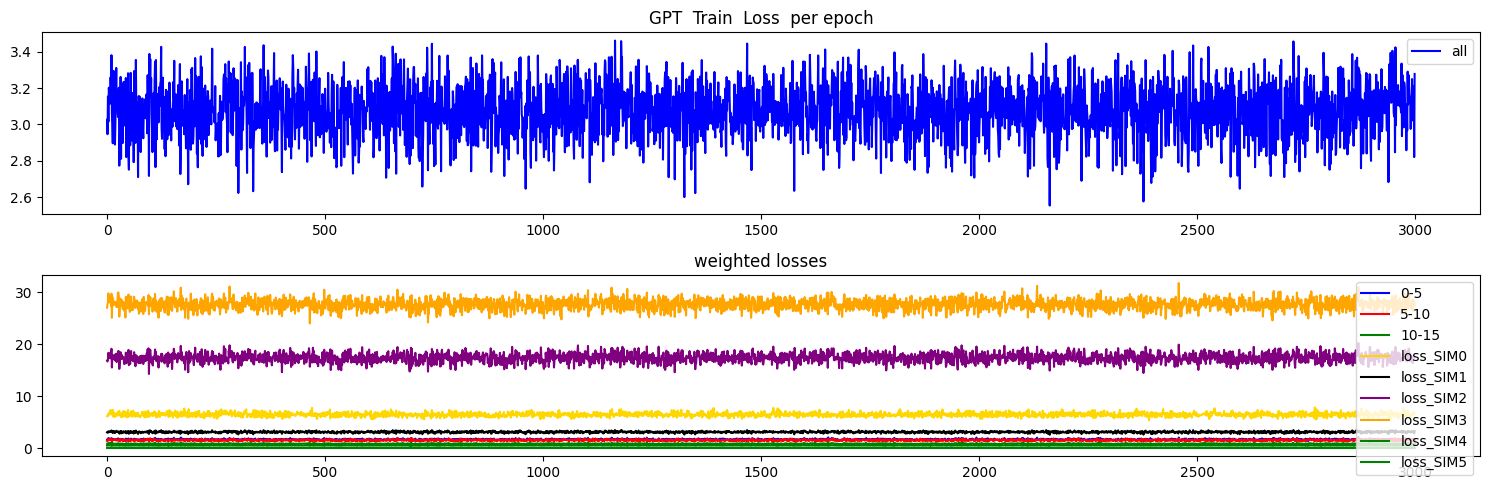

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.05702716112136841
Test MSE Loss - SI only 0-5:  0.14339342713356018
Test MSE Loss - SI only 5-10:  0.08724991232156754
Test MSE Loss - SI only 10-15:  0.11675354093313217
mae, mse, rmse, mape, mspe, rse, corr
(0.18552506, 0.05702715, 0.23880358, 2.465928, 44.048824, 1.4602484)
Testing R**2 - SI only:  -1.1323252263709143
Testing R**2 - SI only:  -1.1323252263709143
Testing R**2 - All features:  0.9687300286226783
Testing R**2 - (f2) - SI full:  -0.41519667098726254


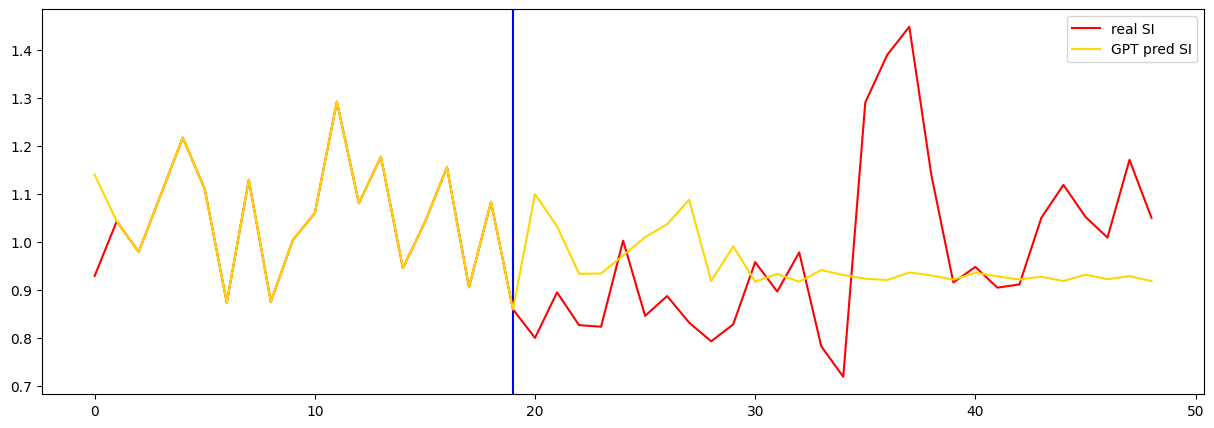

In [36]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


0 train loss =  1.9757952690124512
seq length of pred =  30
500 train loss =  2.014493942260742
seq length of pred =  30
1000 train loss =  2.096238136291504
seq length of pred =  30
1500 train loss =  1.9121729135513306
seq length of pred =  30
2000 train loss =  1.8857641220092773
seq length of pred =  30
2500 train loss =  2.0272209644317627
seq length of pred =  30


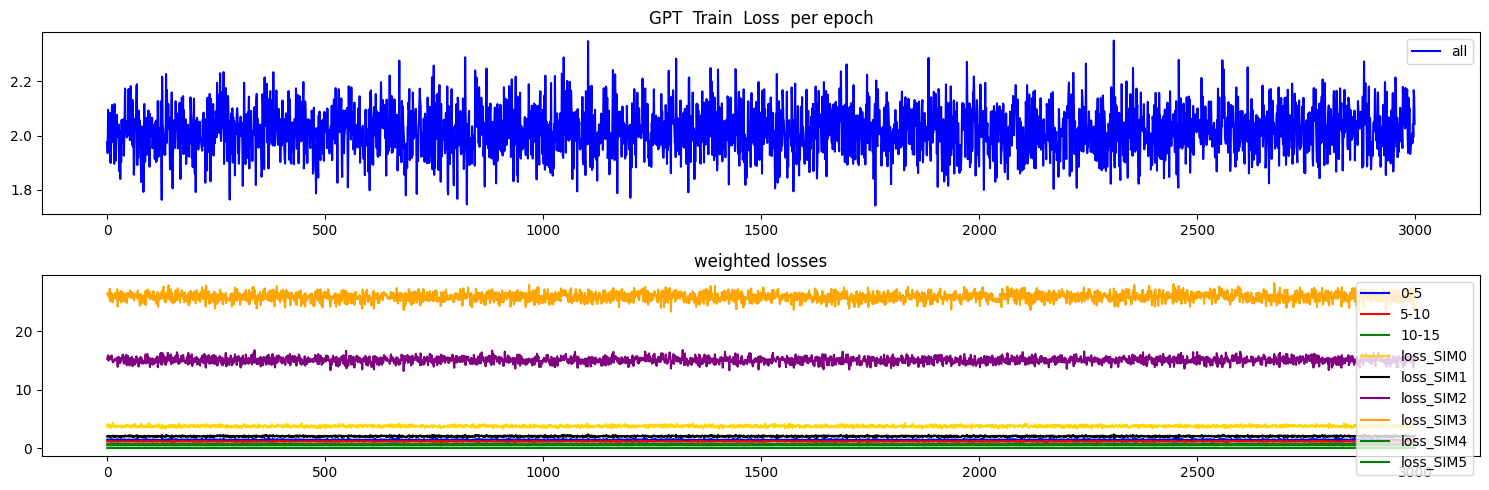

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.024464458227157593
Test MSE Loss - SI only 0-5:  0.018505988642573357
Test MSE Loss - SI only 5-10:  0.015362677164375782
Test MSE Loss - SI only 10-15:  0.03573033958673477
mae, mse, rmse, mape, mspe, rse, corr
(0.13131712, 0.024464458, 0.15641119, 5.1896386, 243.26265, 1.3348465)
Testing R**2 - SI only:  -0.7818150929637586
Testing R**2 - SI only:  -0.7818150929637586
Testing R**2 - All features:  0.9962559130573833
Testing R**2 - (f2) - SI full:  -0.3351958397311843


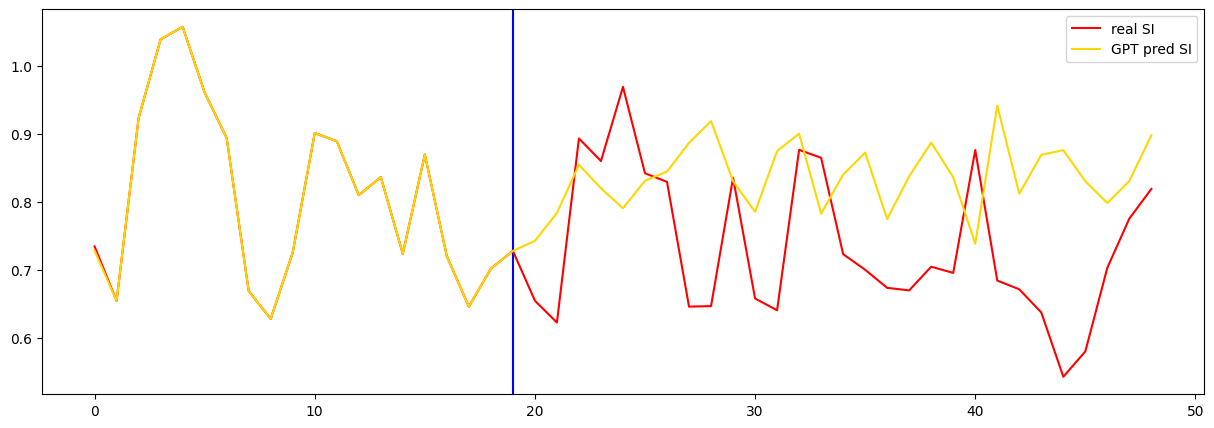

In [37]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


0 train loss =  1.6438685655593872
seq length of pred =  30
500 train loss =  1.889206051826477
seq length of pred =  30
1000 train loss =  1.7401213645935059
seq length of pred =  30
1500 train loss =  1.833282709121704
seq length of pred =  30
2000 train loss =  1.9197180271148682
seq length of pred =  30
2500 train loss =  1.7722634077072144
seq length of pred =  30


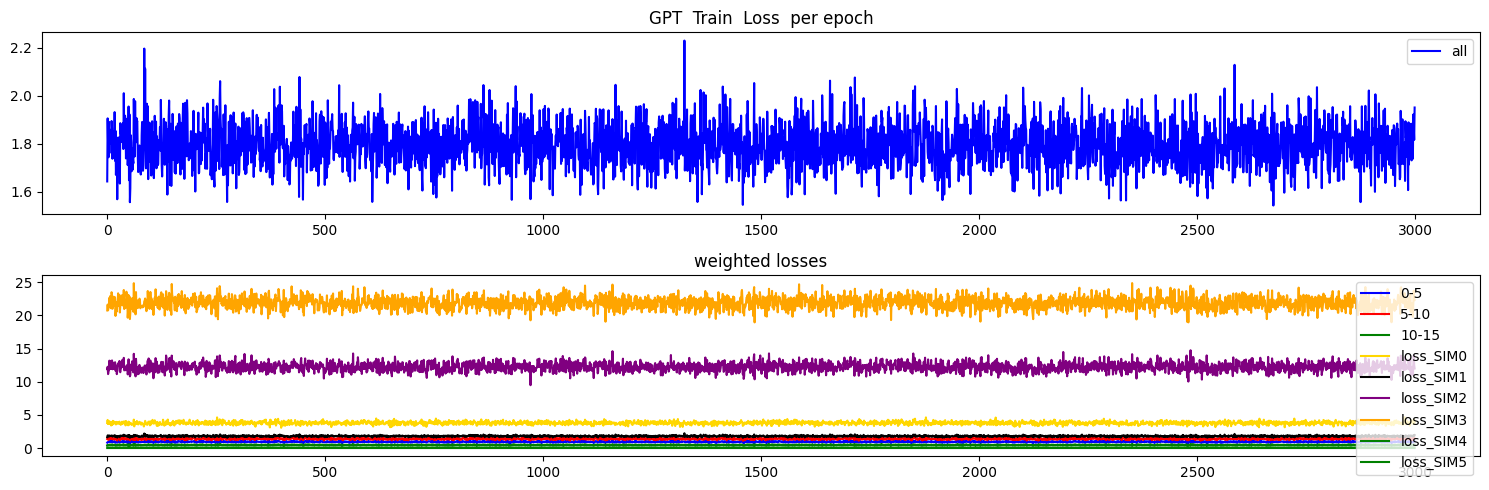

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.059471890330314636
Test MSE Loss - SI only 0-5:  0.07658904790878296
Test MSE Loss - SI only 5-10:  0.1437760591506958
Test MSE Loss - SI only 10-15:  0.0383673831820488
mae, mse, rmse, mape, mspe, rse, corr
(0.19485576, 0.059471883, 0.24386857, 4.3059416, 238.17865, 1.2375654)
Testing R**2 - SI only:  -0.531568157897989
Testing R**2 - SI only:  -0.531568157897989
Testing R**2 - All features:  0.9891697812050873
Testing R**2 - (f2) - SI full:  -0.10757853132522377


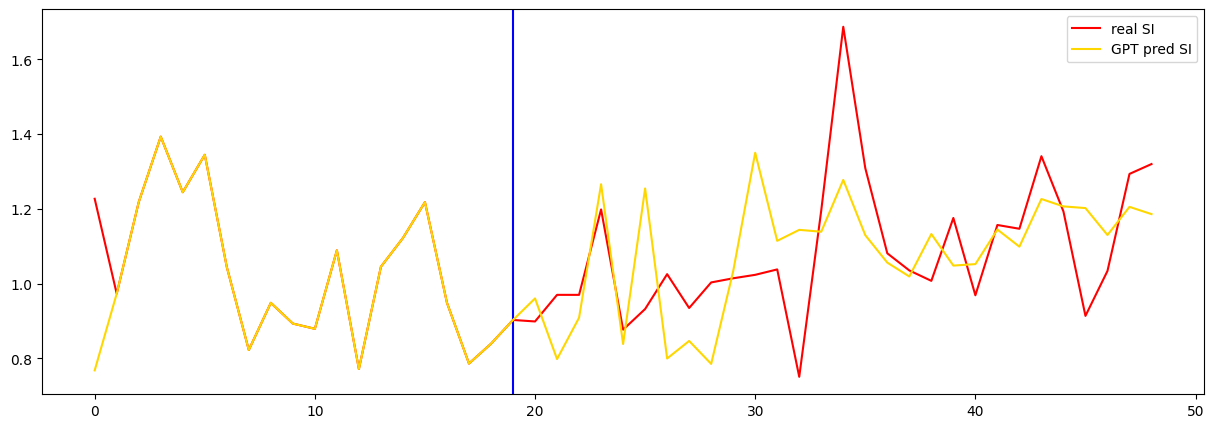

In [38]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


0 train loss =  3.4175784587860107
seq length of pred =  30
500 train loss =  2.840975284576416
seq length of pred =  30
1000 train loss =  2.4467201232910156
seq length of pred =  30
1500 train loss =  2.773277759552002
seq length of pred =  30
2000 train loss =  2.9462027549743652
seq length of pred =  30
2500 train loss =  2.961869239807129
seq length of pred =  30


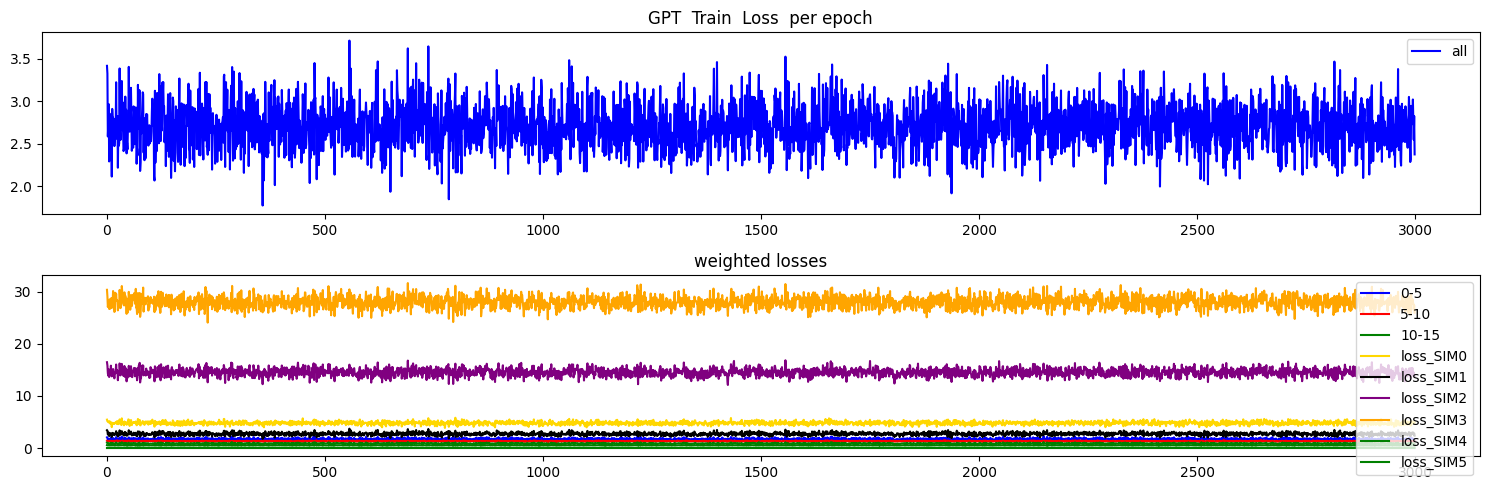

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.03690659627318382
Test MSE Loss - SI only 0-5:  0.010792206972837448
Test MSE Loss - SI only 5-10:  0.02553936280310154
Test MSE Loss - SI only 10-15:  0.09453092515468597
mae, mse, rmse, mape, mspe, rse, corr
(0.15404911, 0.036906593, 0.19211088, 5.544141, 472.23596, 1.4468882)
Testing R**2 - SI only:  -1.0934854049271285
Testing R**2 - SI only:  -1.0934854049271285
Testing R**2 - All features:  0.9842318031289953
Testing R**2 - (f2) - SI full:  -2.7353021914271745


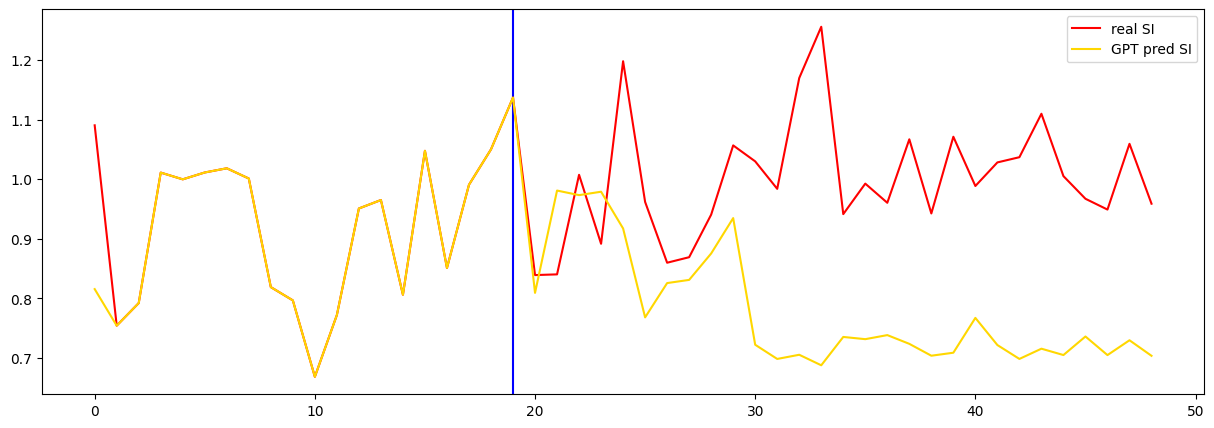

In [39]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


0 train loss =  2.3602237701416016
seq length of pred =  30
500 train loss =  2.2033684253692627
seq length of pred =  30
1000 train loss =  2.165971517562866
seq length of pred =  30
1500 train loss =  2.460479736328125
seq length of pred =  30
2000 train loss =  2.7218849658966064
seq length of pred =  30
2500 train loss =  2.3627681732177734
seq length of pred =  30


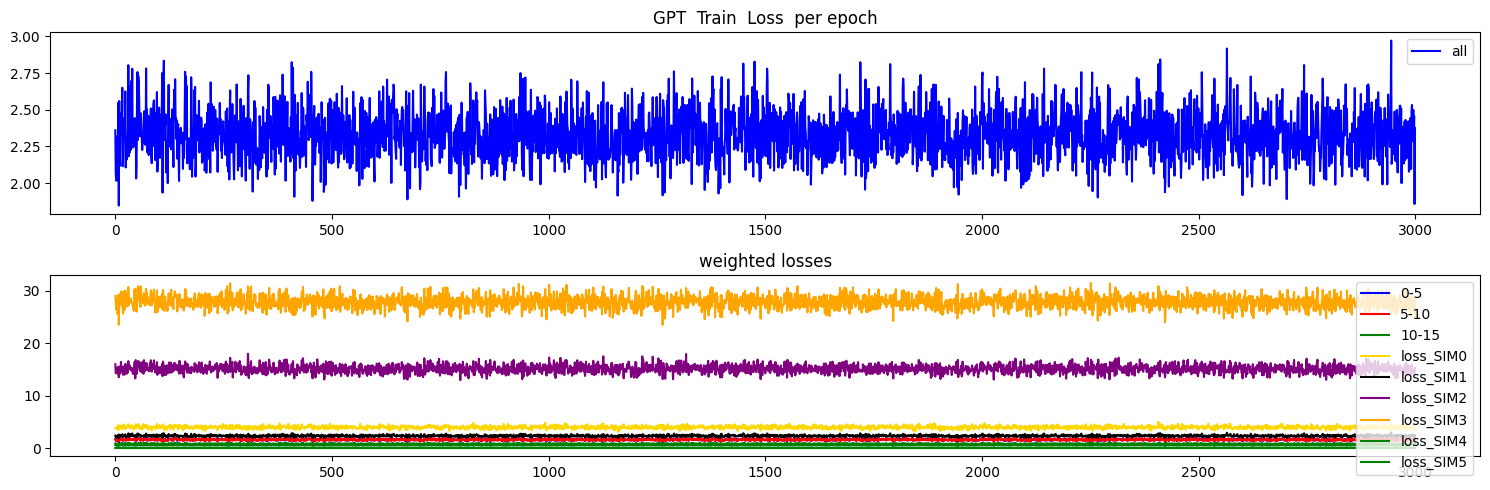

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.034373294562101364
Test MSE Loss - SI only 0-5:  0.10402335226535797
Test MSE Loss - SI only 5-10:  0.02178020589053631
Test MSE Loss - SI only 10-15:  0.051953643560409546
mae, mse, rmse, mape, mspe, rse, corr
(0.14778754, 0.034373295, 0.18540037, 8.318983, 2025.3314, 1.2782686)
Testing R**2 - SI only:  -0.6339706445508253
Testing R**2 - SI only:  -0.6339706445508253
Testing R**2 - All features:  0.9936657444647935
Testing R**2 - (f2) - SI full:  0.048766496816791016


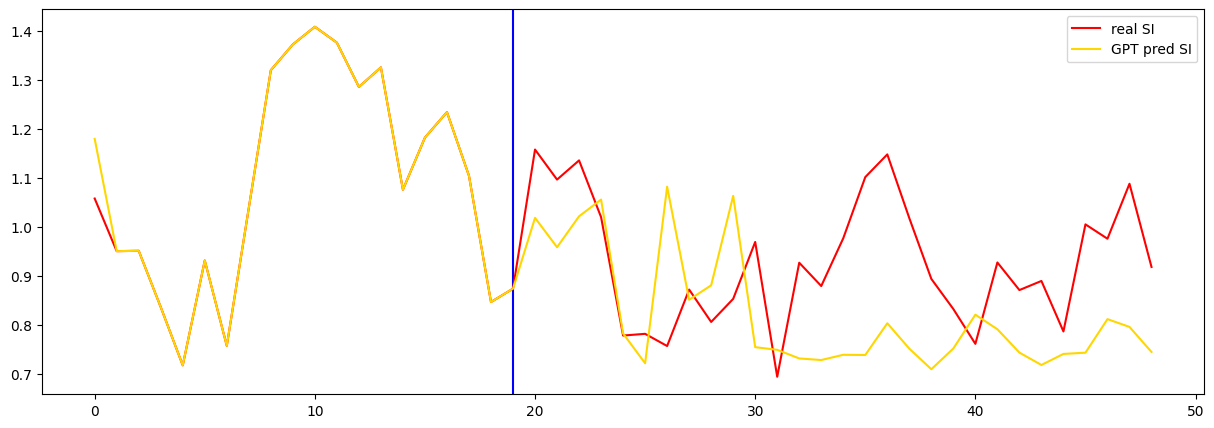

In [40]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [41]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [42]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
